# Data Exploration & Visualization

## Importing Libraries

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

## Reading in Data

In [3]:
DATASETS_FOLDER_PATH = "C:/Users/Killian/Desktop/FYP-Multistage-Throughput-Predictor/Datasets/Raw/"
raw_data_path = DATASETS_FOLDER_PATH + "all_4G_data.csv"

raw_data = pd.read_csv(raw_data_path, index_col=None)

C:\Users\Killian\AppData\Local\Temp\ipykernel_16432\1448511203.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(raw_data_path, index_col=None)


## Formatting Data

In [4]:
raw_data = raw_data.replace({"-":np.nan})

In [5]:
raw_data.dtypes

Timestamp                object
Longitude               float64
Latitude                float64
Speed                     int64
Operatorname             object
CellID                    int64
NetworkMode              object
RSRP                      int64
RSRQ                     object
SNR                      object
CQI                      object
RSSI                     object
DL_bitrate                int64
UL_bitrate                int64
State                    object
NRxRSRP                  object
NRxRSRQ                  object
ServingCell_Lon          object
ServingCell_Lat          object
ServingCell_Distance     object
movement_type            object
session                   int64
dtype: object

In [6]:
raw_data["Timestamp"] = pd.to_datetime(raw_data["Timestamp"], format="%Y.%m.%d_%H.%M.%S")

In [7]:
raw_data[["RSRQ", "SNR", "CQI", "RSSI", "NRxRSRP", "NRxRSRQ", "ServingCell_Distance", "ServingCell_Lat", "ServingCell_Lon"]] = raw_data[["RSRQ", "SNR", "CQI", "RSSI", "NRxRSRP", "NRxRSRQ", "ServingCell_Distance", "ServingCell_Lat", "ServingCell_Lon"]].astype(float)

In [8]:
raw_data.dtypes

Timestamp               datetime64[ns]
Longitude                      float64
Latitude                       float64
Speed                            int64
Operatorname                    object
CellID                           int64
NetworkMode                     object
RSRP                             int64
RSRQ                           float64
SNR                            float64
CQI                            float64
RSSI                           float64
DL_bitrate                       int64
UL_bitrate                       int64
State                           object
NRxRSRP                        float64
NRxRSRQ                        float64
ServingCell_Lon                float64
ServingCell_Lat                float64
ServingCell_Distance           float64
movement_type                   object
session                          int64
dtype: object

# Dataset Understanding

While the dataset contains many potentially valuable features it is important to note how the dataset was constructed.
Most of the columns were collected directly from the device using the G-NetTrack App for android.
The following columns are widely reported on in the G-NetTrack App and thus measurements are available consistently
This includes:
 - Longitude
 - Latitude
 - Speed
 - Operatorname
 - NetworkMode
 - RSRP
 - RSRQ (VERY FEW DEVICES SUPPORT REPORTING THIS VALUE)
 - SNR
 - CQI
 - DL_bitrate
 - UL_bitrate
 - State
 - NRxRSRP (Many missing values)
 - NRxRSRQ (Many missing values)

NRxRSRP and NRxRSRQ may not be subject to missing at random assumption as it is possible that there are no other serving towers nearby when nan is reported.

## Checking For Missing Values

<AxesSubplot: >

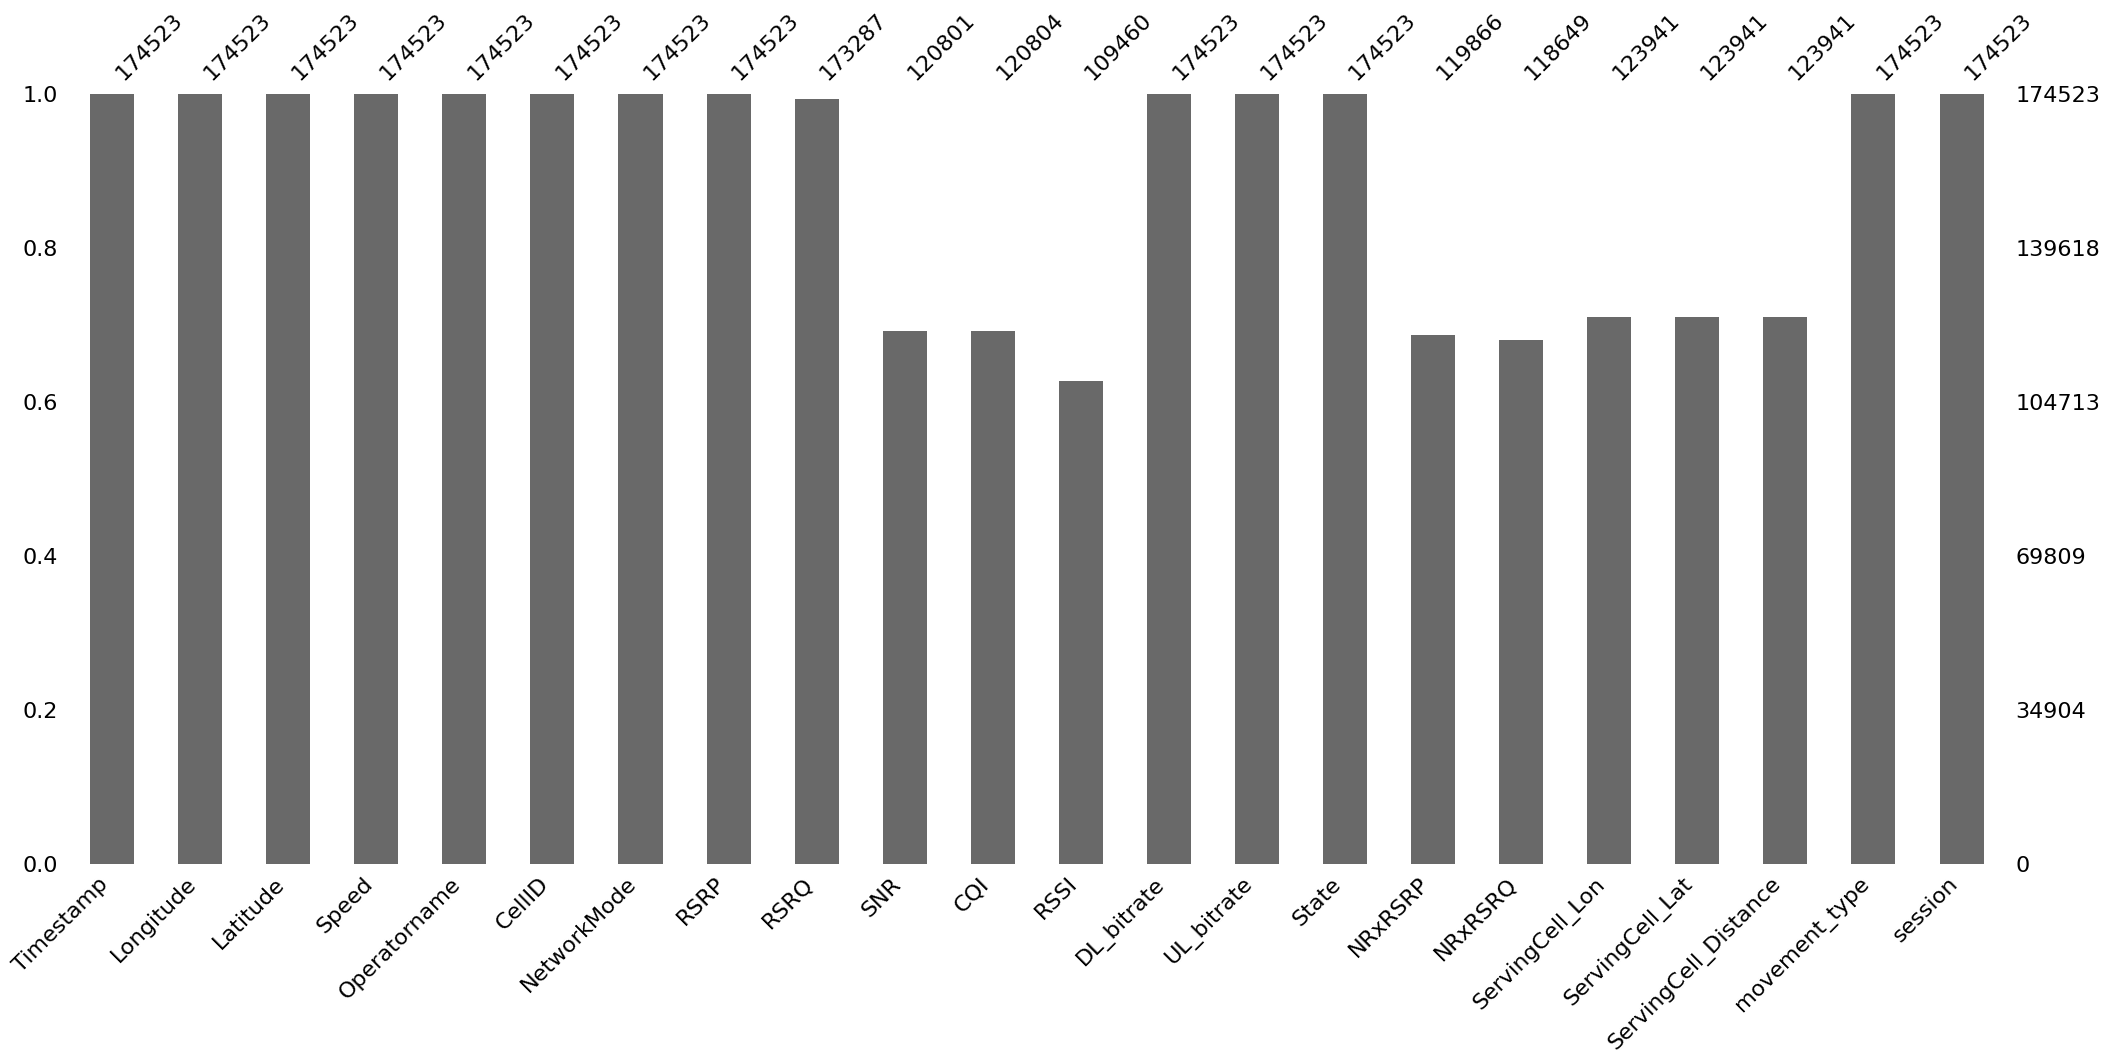

In [9]:
msno.bar(raw_data)

<AxesSubplot: >

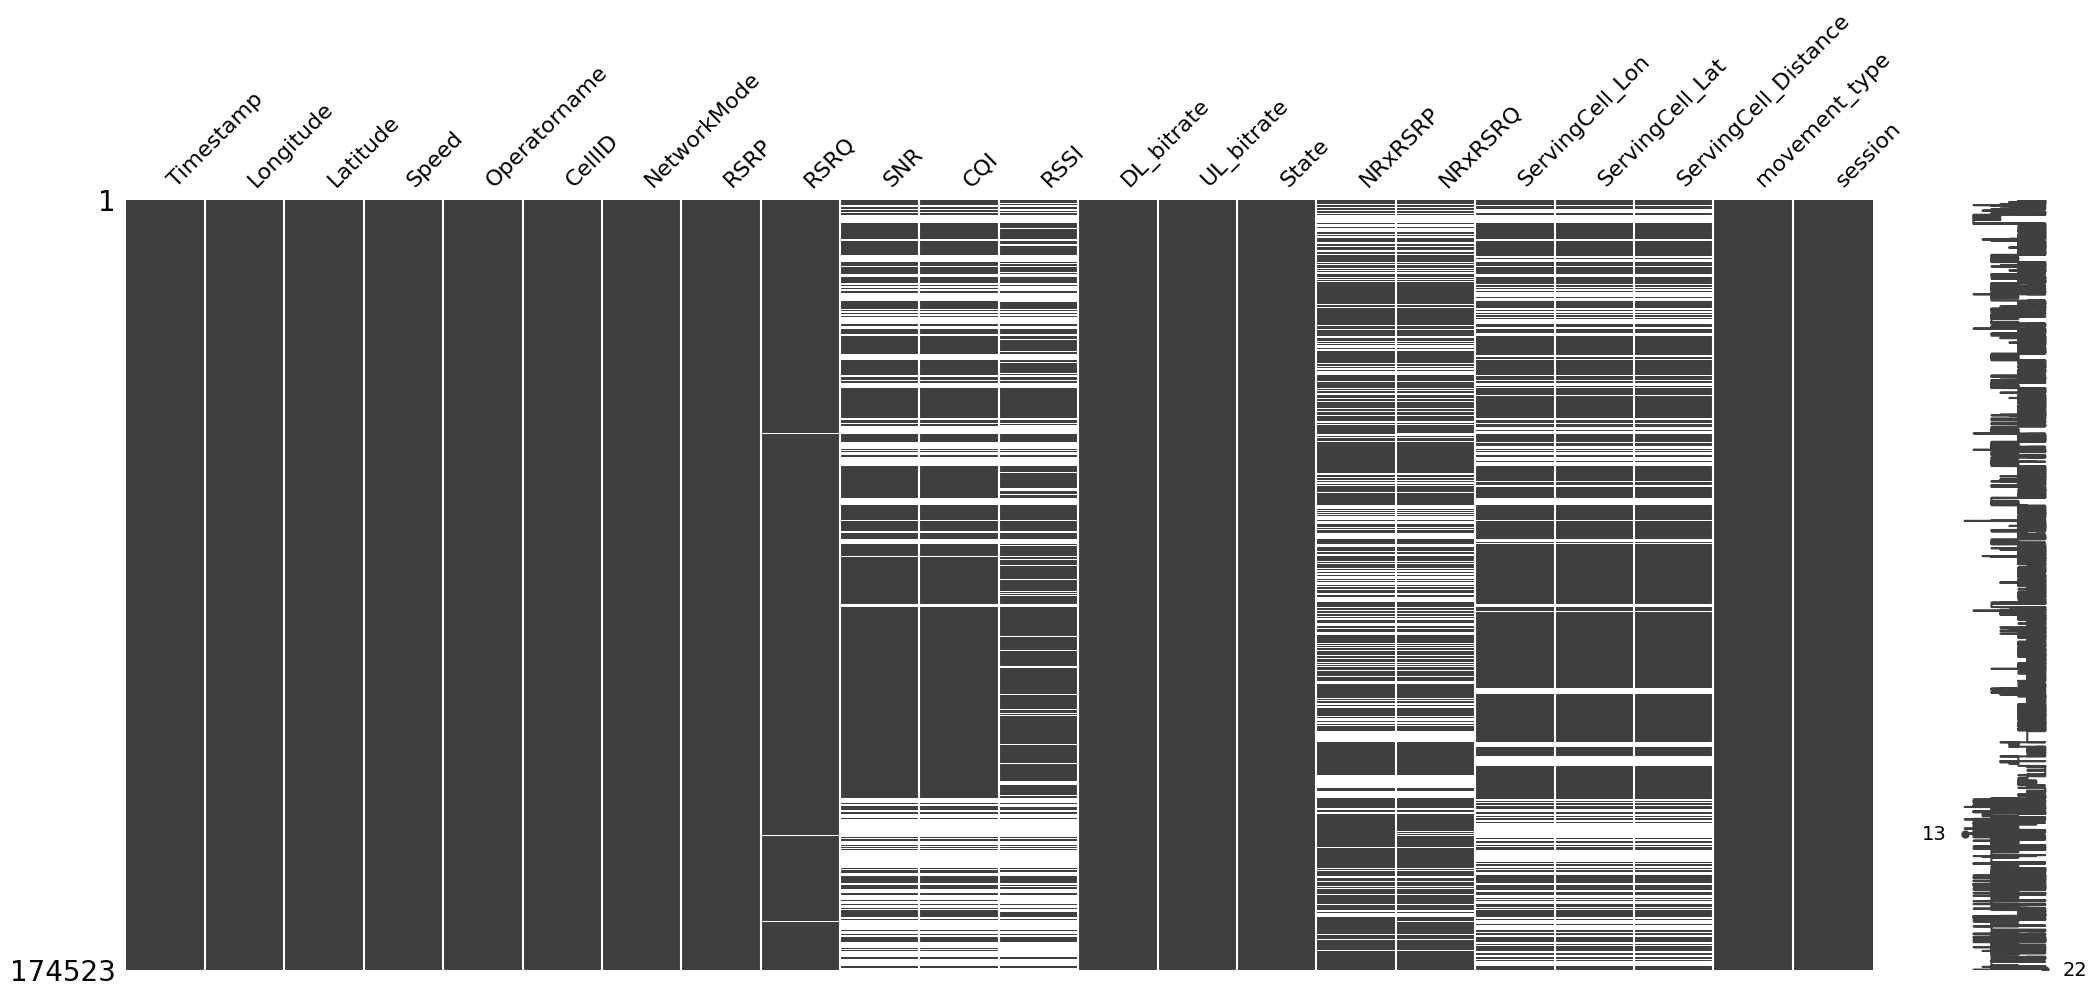

In [10]:
msno.matrix(raw_data)

<AxesSubplot: >

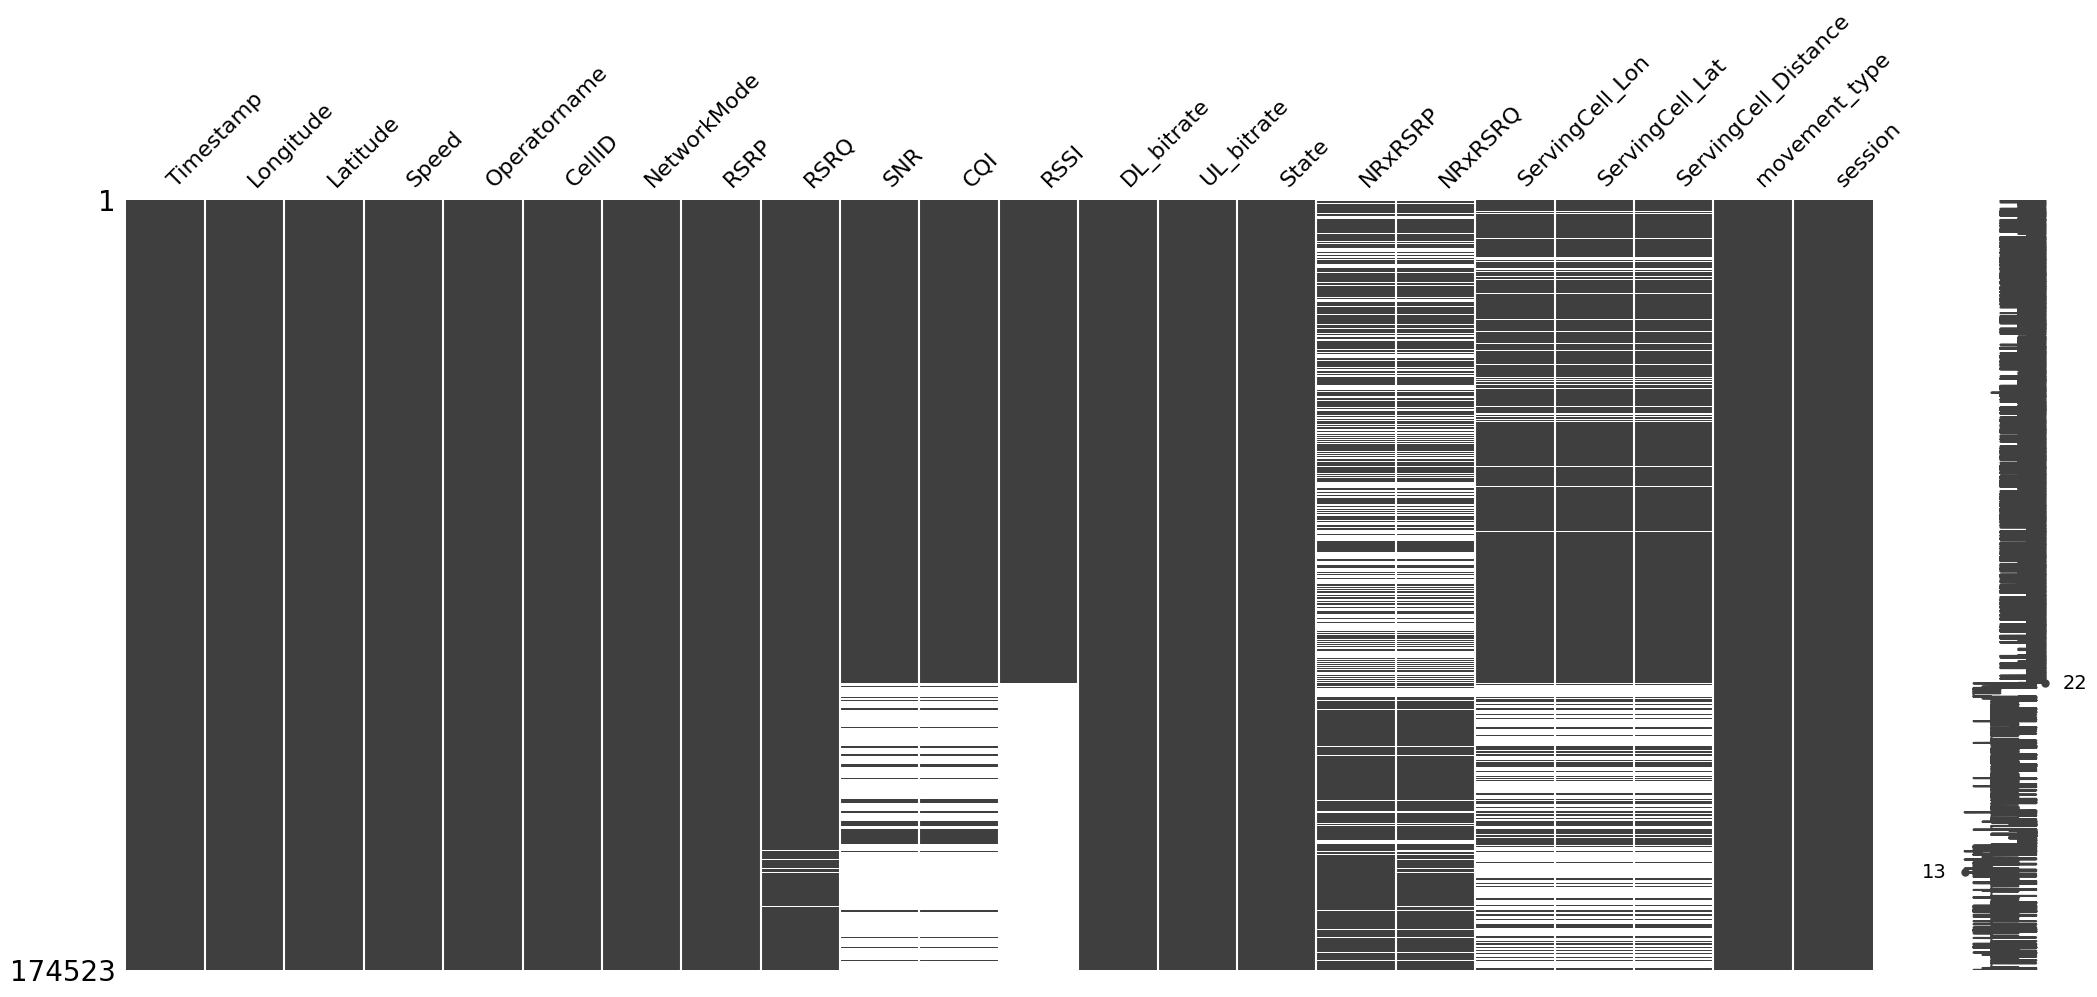

In [11]:
rssi_ordered_raw_data = raw_data.copy().sort_values("RSSI")
msno.matrix(rssi_ordered_raw_data)

- There seems to be a correlation between missing values for SNR, CQI, RSSI, ServingCell_long, ServingCell_Lat, ServingCell_Distance.
- When the above features are missing it is likely that there exists a nearby tower as seen by consistent values for NRxRSRP and NRxRSRQ
- It seems that these features stop being reported on the edge of a serving cells range and as such the mobile device will be swapping serving cells.

## Examining values when servingcell is possibly changing

In [14]:
# edge_values = raw_data[raw_data["RSSI"].isna()]
# mean_dl = round(edge_values["DL_bitrate"].mean(), 2)
# var_dl = round(edge_values["DL_bitrate"].var(), 2)
# sd_dl = round(edge_values["DL_bitrate"].std(), 2)
# print("Possible transition phase mean:",mean_dl)
# print("Standard dev:", sd_dl)
# print("Variance:", var_dl, "\n---------------\n")
# global_mean = round(raw_data["DL_bitrate"].mean(), 2)
# global_var = round(raw_data["DL_bitrate"].var(), 2)
# global_std = round(raw_data["DL_bitrate"].std(), 2)
# print("Global mean:", global_mean)
# print("Global std:", global_std)
# print("Global variance:", global_var)

# print(edge_values["CQI"].max())

raw_data["SNR"].fillna(raw_data["SNR"].min(), inplace=True)
print("In SNR place")
print(raw_data["SNR"].isnull().sum())
print(raw_data["SNR"].min())

In SNR place
0
-30.0


## Takeaways for Imputation

- SNR, CQI, RSSI only missing when servingcell is being changed. These situations should have the minimum (worst quality) value imputed.
- Serving cell distance is should have the maximum distance imputed. However this feature itself is rarely reported by the device anyway and should probably be excluded
- NRxRSRP and NRxRSRQ are far more likely to be missing when the mobile device has a solid connection to its servingcell. As such possible makes sense to impute based solely on data when RSSI is not NaN

## Distribution of Columns

array([[<AxesSubplot: title={'center': 'Timestamp'}>,
        <AxesSubplot: title={'center': 'Longitude'}>,
        <AxesSubplot: title={'center': 'Latitude'}>,
        <AxesSubplot: title={'center': 'Speed'}>],
       [<AxesSubplot: title={'center': 'CellID'}>,
        <AxesSubplot: title={'center': 'RSRP'}>,
        <AxesSubplot: title={'center': 'RSRQ'}>,
        <AxesSubplot: title={'center': 'SNR'}>],
       [<AxesSubplot: title={'center': 'CQI'}>,
        <AxesSubplot: title={'center': 'RSSI'}>,
        <AxesSubplot: title={'center': 'DL_bitrate'}>,
        <AxesSubplot: title={'center': 'UL_bitrate'}>],
       [<AxesSubplot: title={'center': 'NRxRSRP'}>,
        <AxesSubplot: title={'center': 'NRxRSRQ'}>,
        <AxesSubplot: title={'center': 'ServingCell_Lon'}>,
        <AxesSubplot: title={'center': 'ServingCell_Lat'}>],
       [<AxesSubplot: title={'center': 'ServingCell_Distance'}>,
        <AxesSubplot: title={'center': 'session'}>, <AxesSubplot: >,
        <AxesSubplot: >

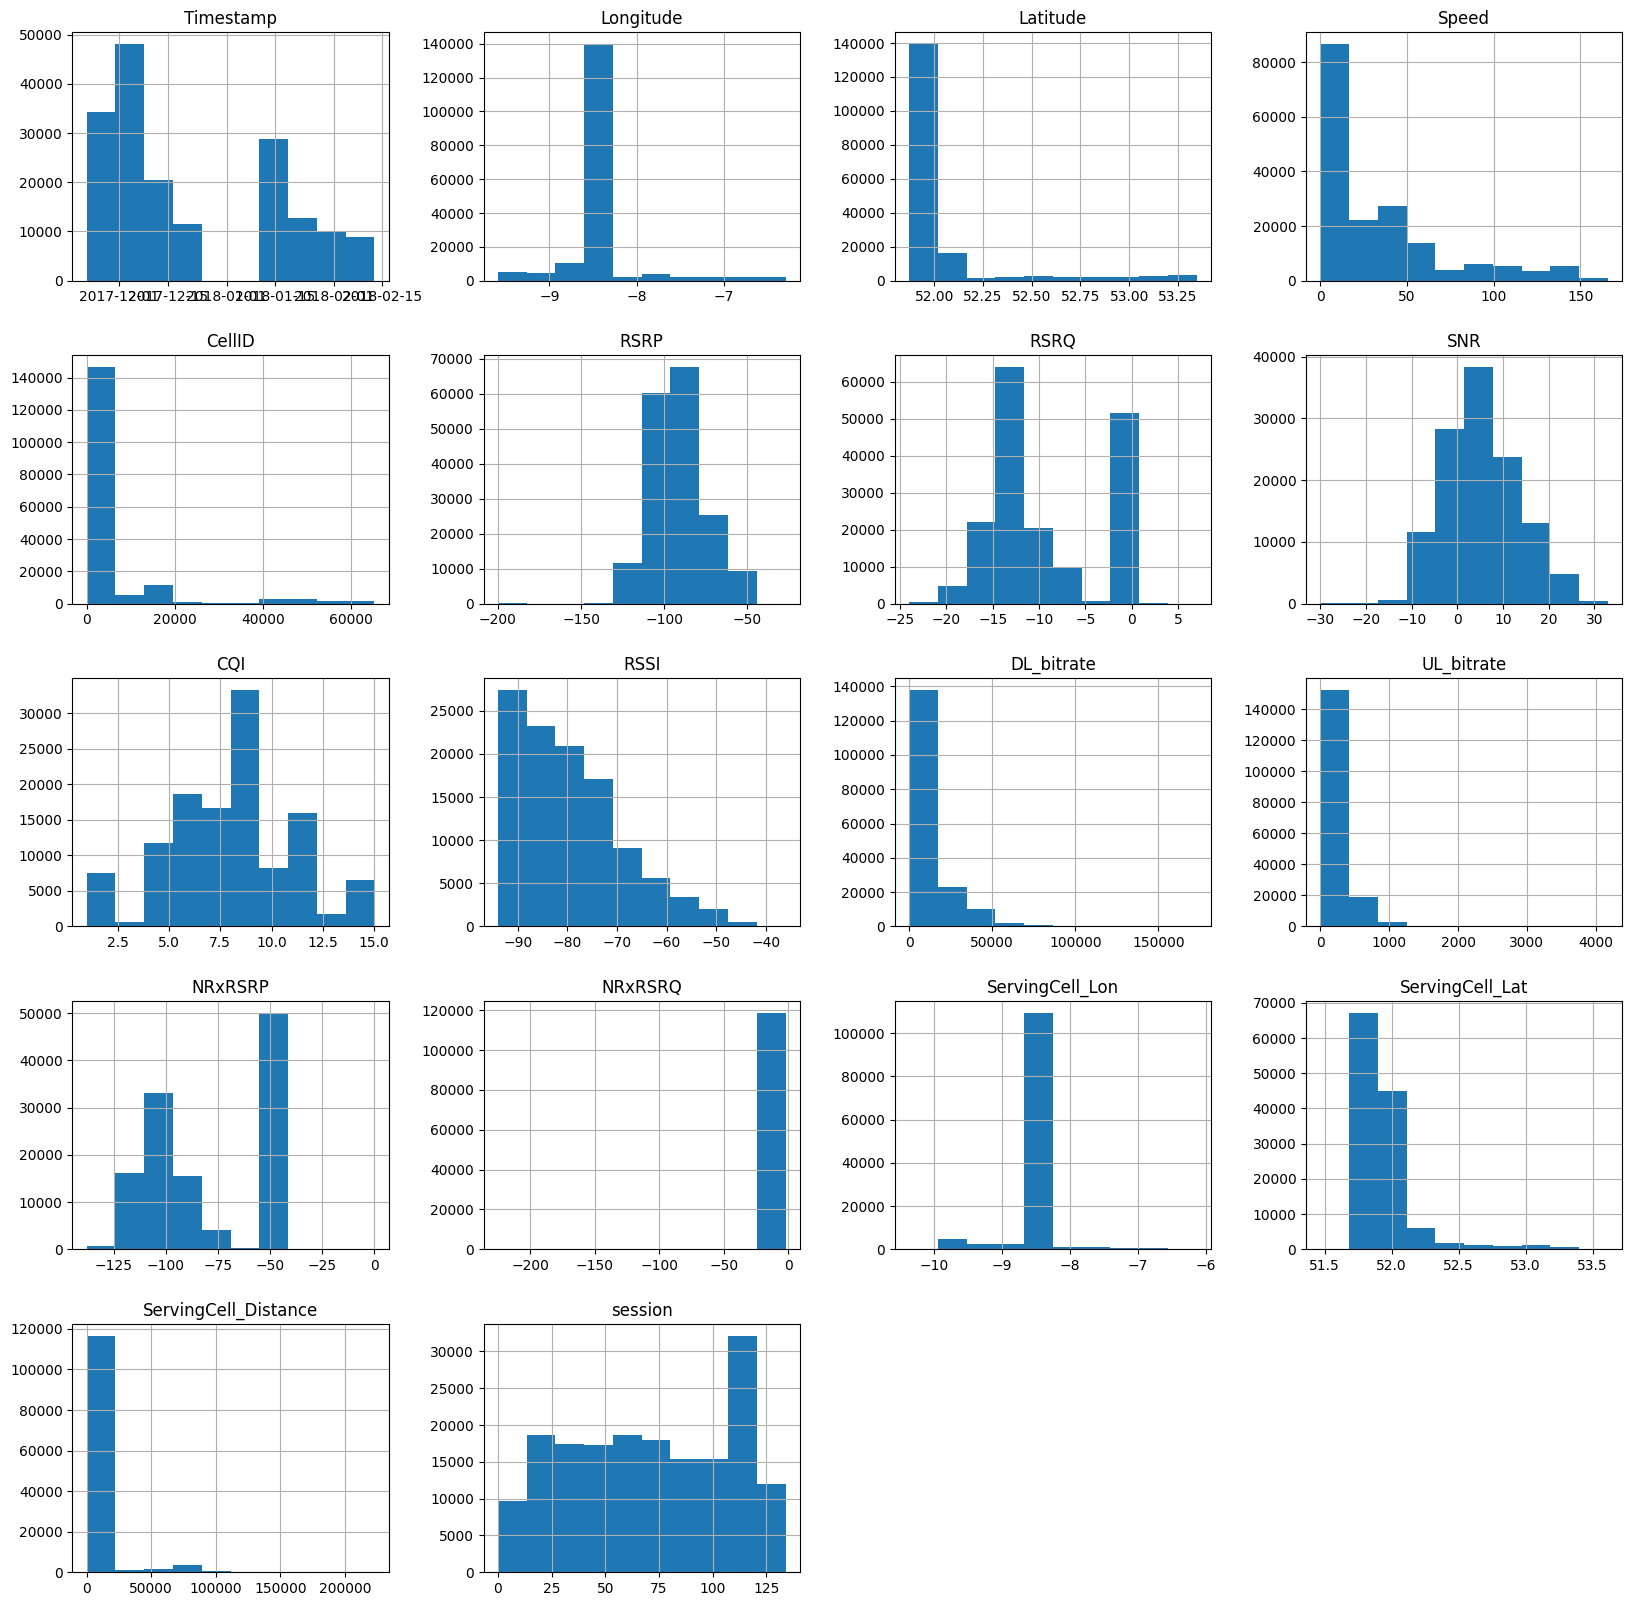

In [13]:
raw_data.hist(figsize=(20,20))

array([[<AxesSubplot: title={'center': 'DL_bitrate'}>]], dtype=object)

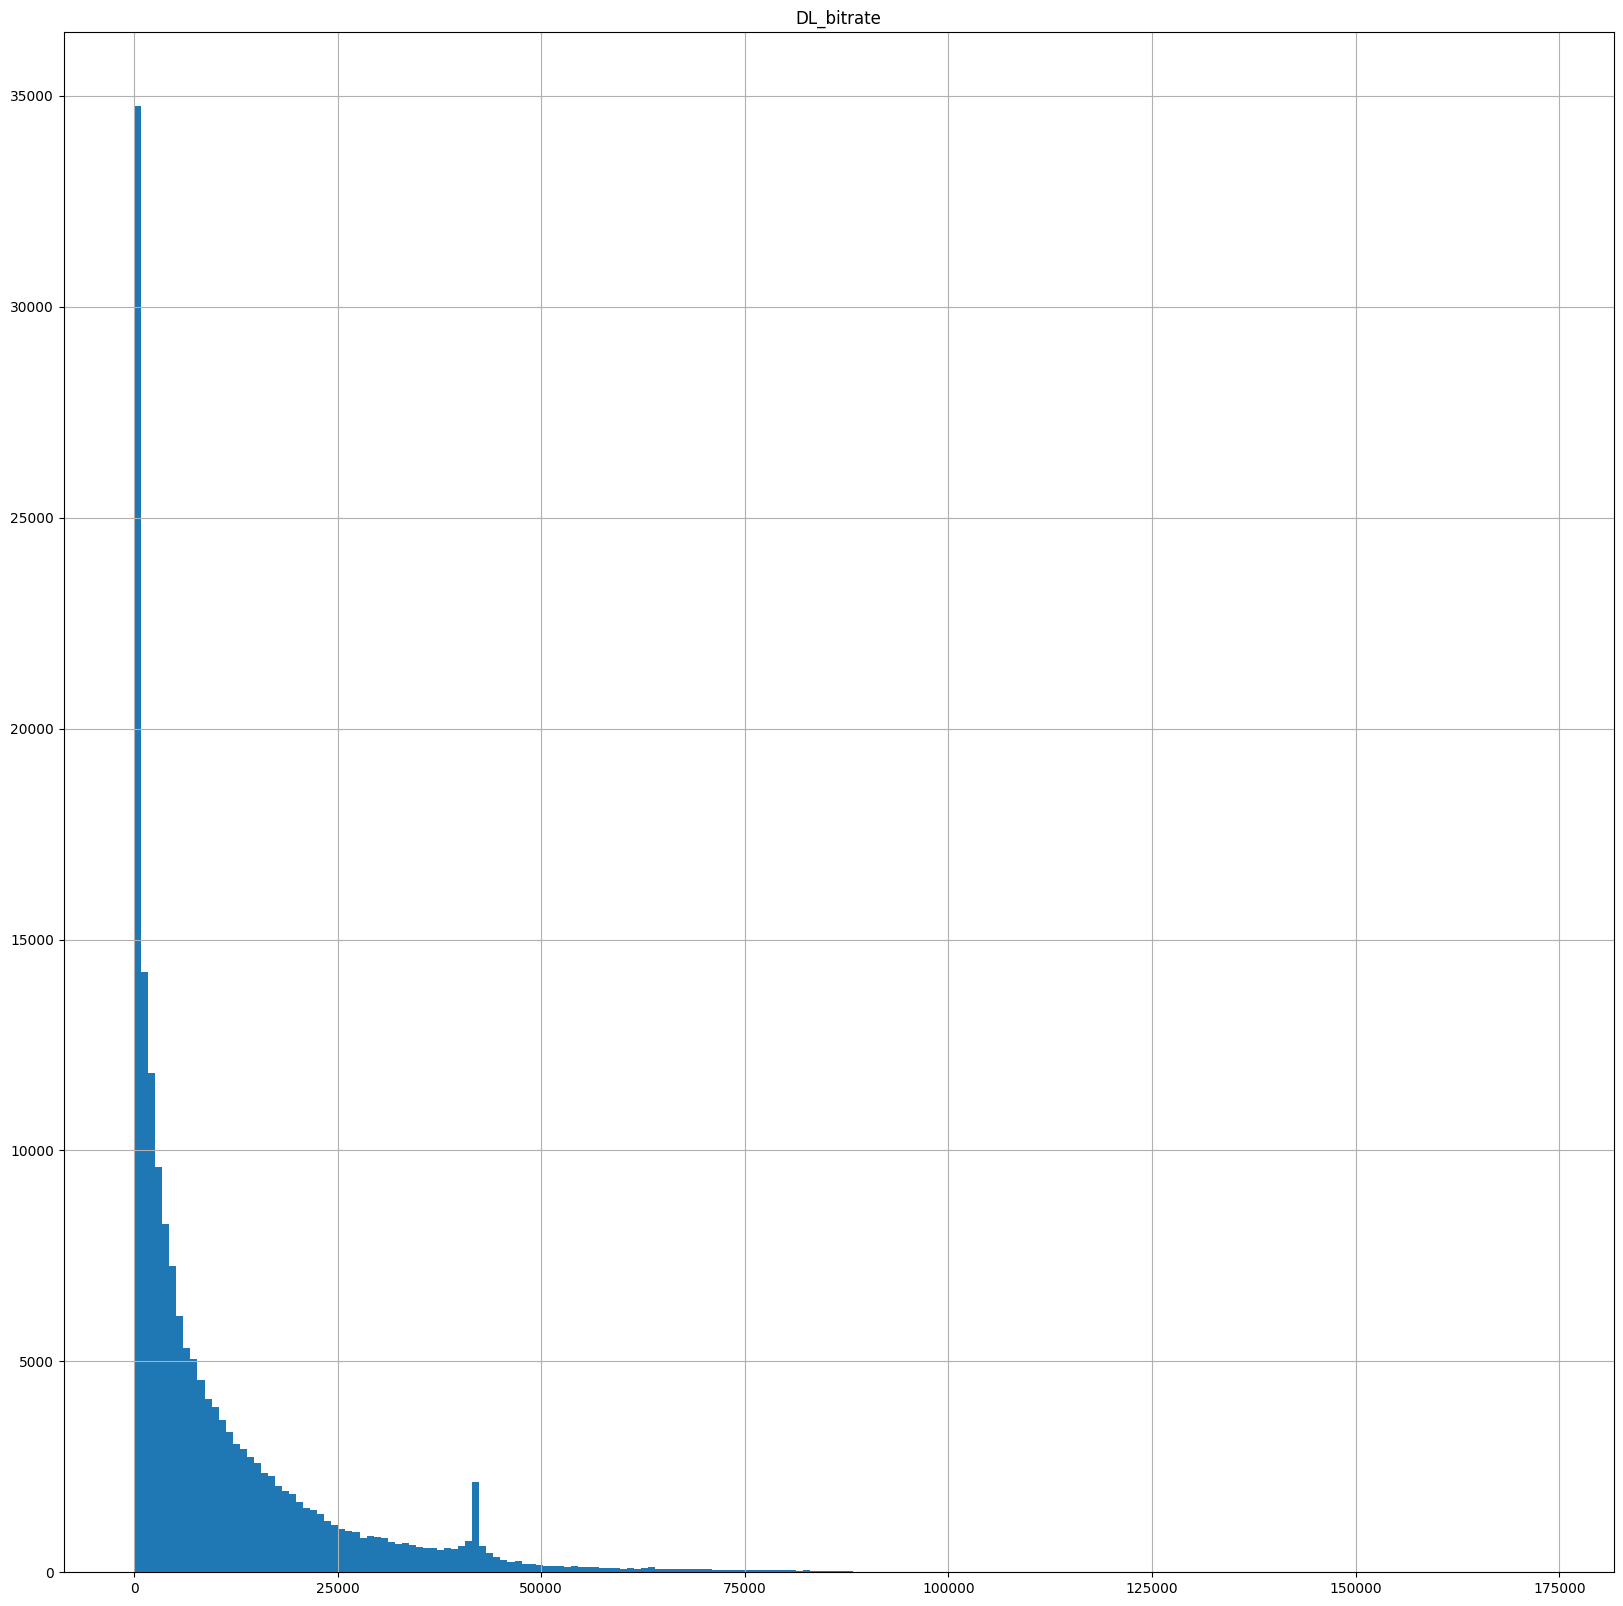

In [14]:
raw_data.hist(column="DL_bitrate",figsize=(20,20),bins=200)

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>,
        <AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>,
        <AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>,
        <AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>],
       [<AxesSubplot: title={'center': '12'}>,
        <AxesSubplot: title={'center': '13'}>,
        <AxesSubplot: title={'center': '14'}>,
        <AxesSubplot: title={'center': '15'}>,
        <AxesSubplot: title={'center': '16'}>,
        <AxesSubplot: title={'center': '17'}>,
        <AxesSubplot: title={'center': '18'}>,
        <AxesSubplot: title={'center': '19'}>,
        <AxesSubplot: title={'center': '20'}>,
        <AxesSubplot: 

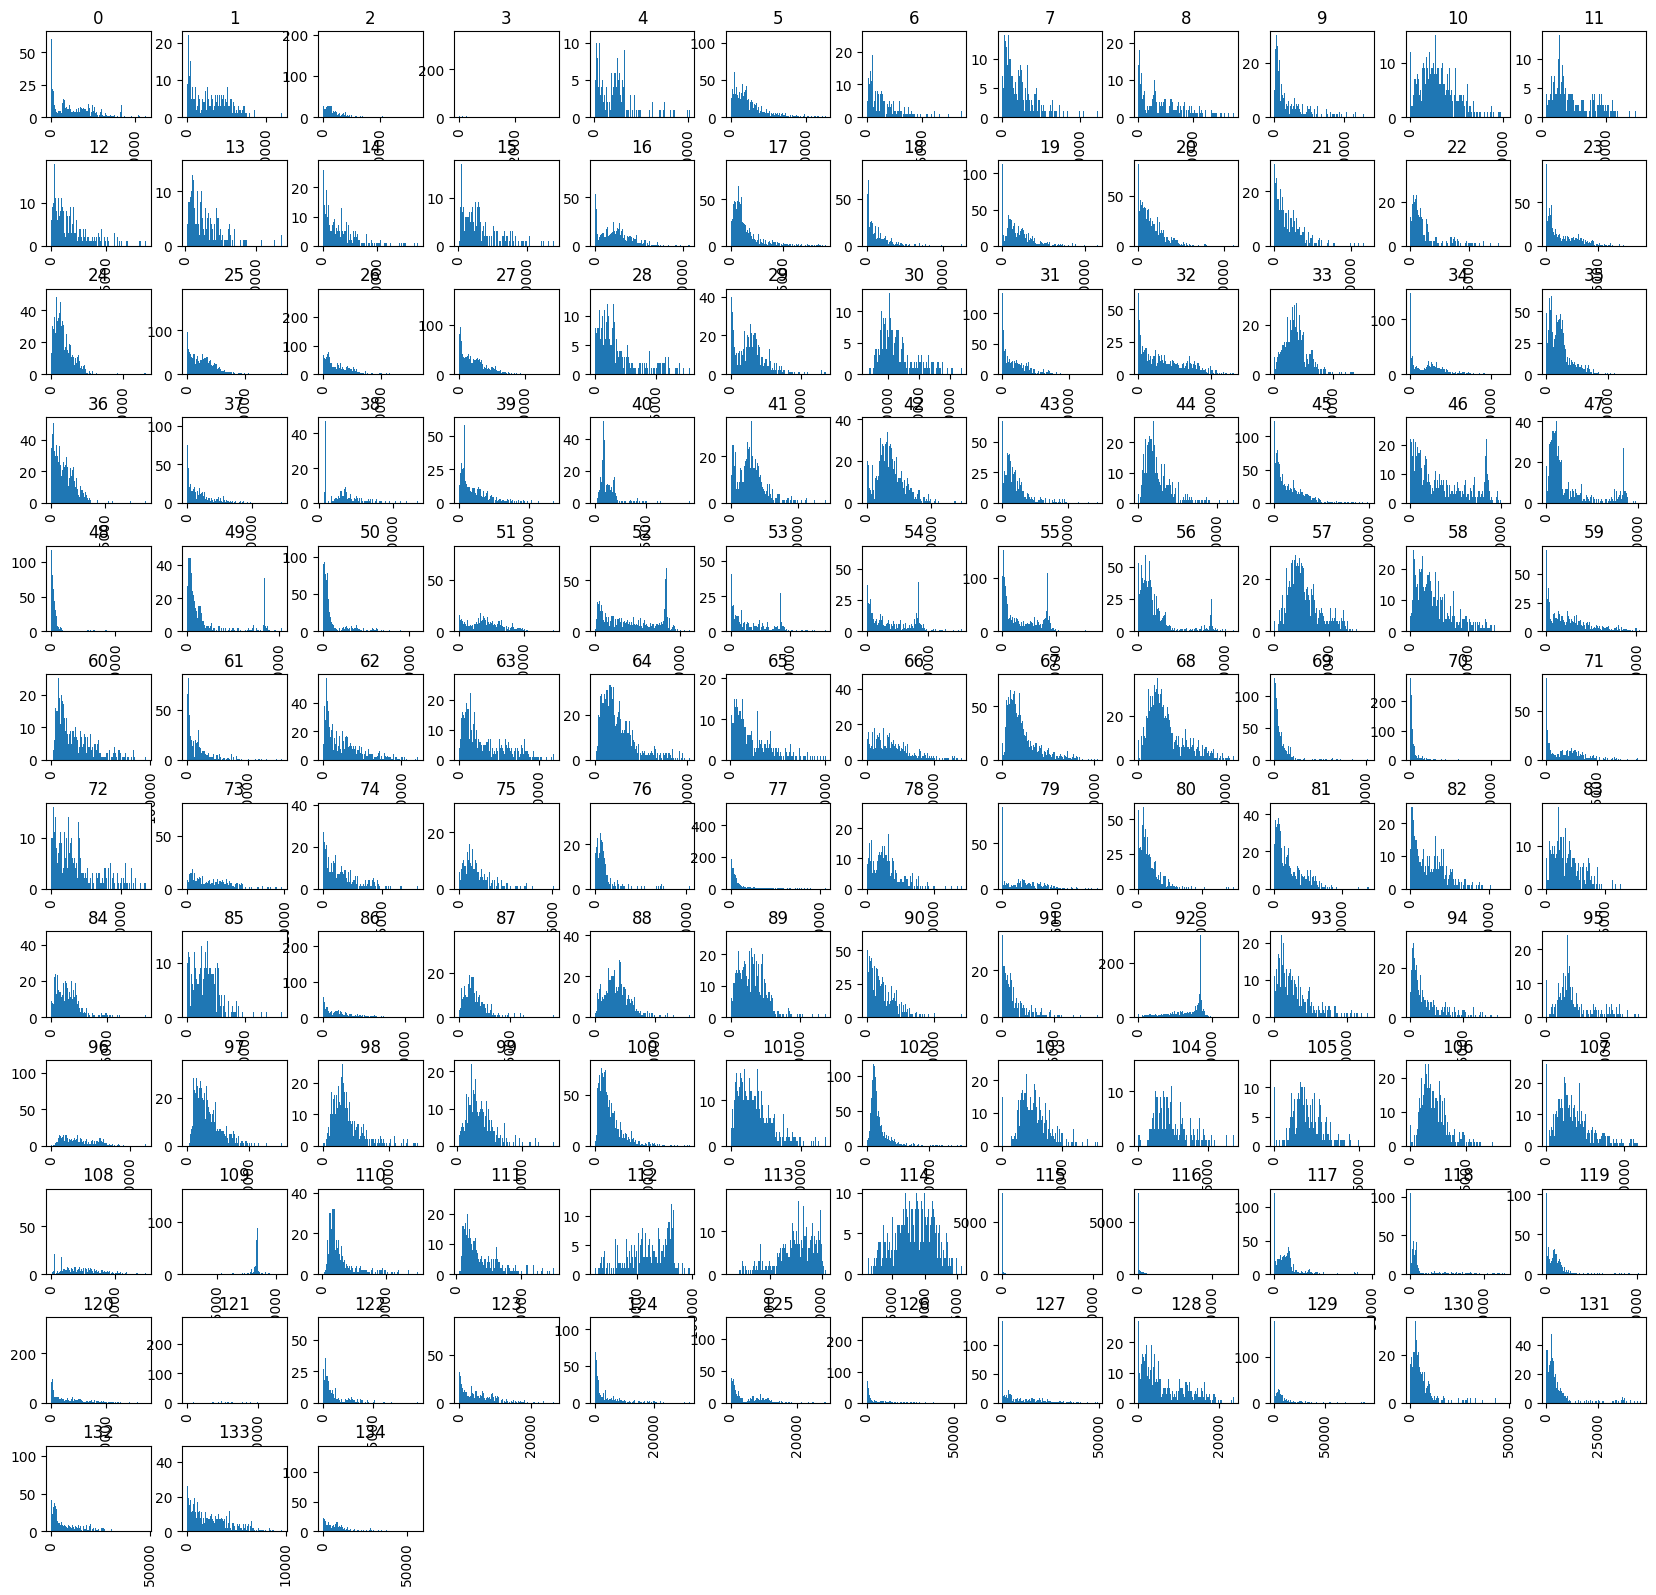

In [15]:
raw_data.hist(column="DL_bitrate",figsize=(20,20),bins=200, by="session")

In [16]:
print(raw_data["CellID"].sort_values())

109606        0
131244        0
131245        0
131246        0
131247        0
          ...  
172616    65353
172617    65353
172618    65353
172649    65353
172650    65353
Name: CellID, Length: 174523, dtype: int64


## Time Series Analysis

### Static Instances

In [17]:
static_data = raw_data.copy()[raw_data["movement_type"] == "static"]

In [18]:
print(static_data["session"].sort_values())

120286    100
122031    100
122032    100
122033    100
122034    100
         ... 
135012    114
135013    114
135014    114
135004    114
135546    114
Name: session, Length: 15261, dtype: int64


Graph for just one session

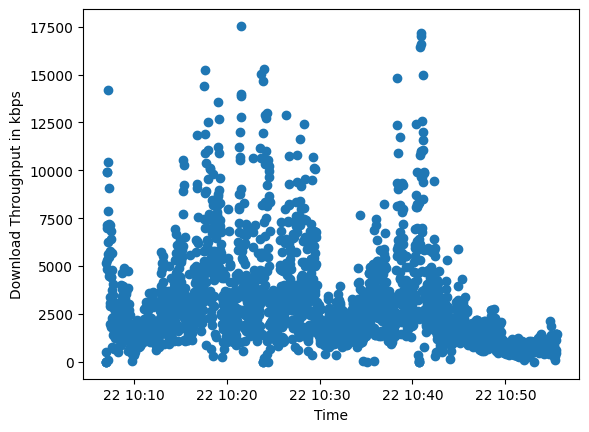

In [19]:
x_points = static_data[(static_data["session"]==100)]["Timestamp"]
y_points = static_data[(static_data["session"]==100)]["DL_bitrate"]
fig, ax = plt.subplots()
ax.scatter(x_points, y_points)
ax.set_xlabel("Time")
ax.set_ylabel("Download Throughput in kbps")
plt.show()

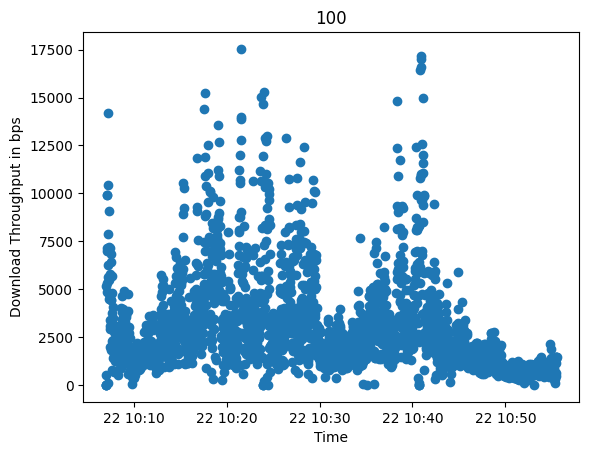

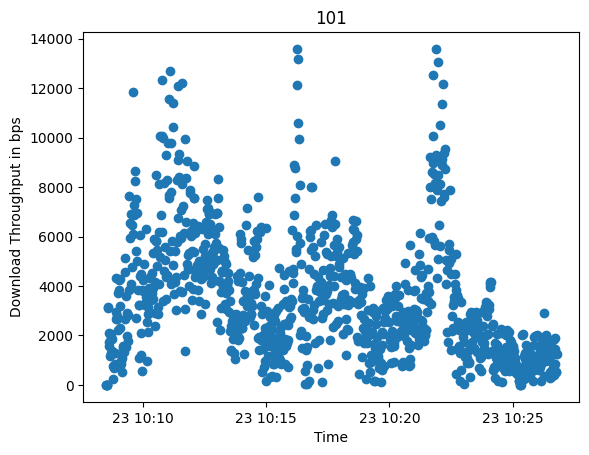

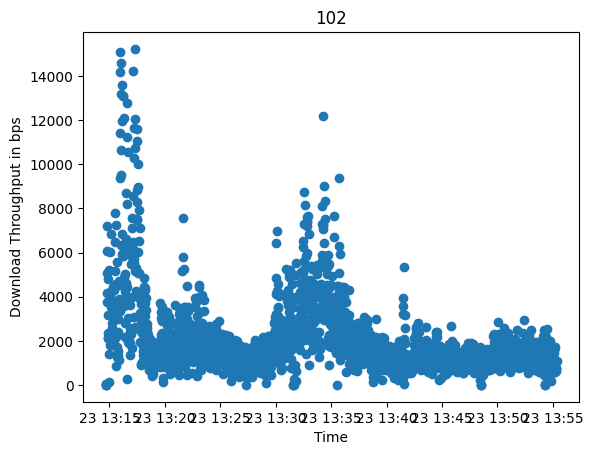

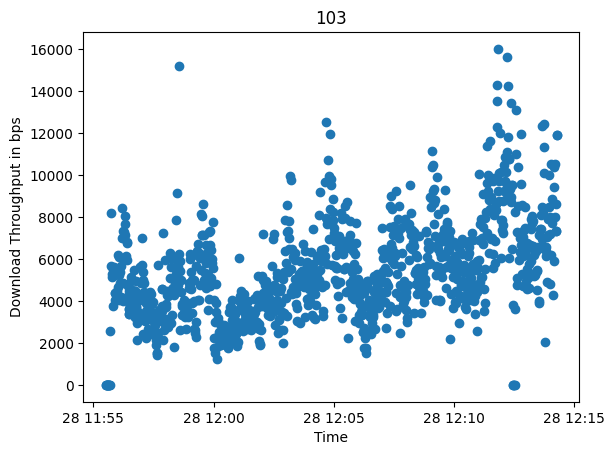

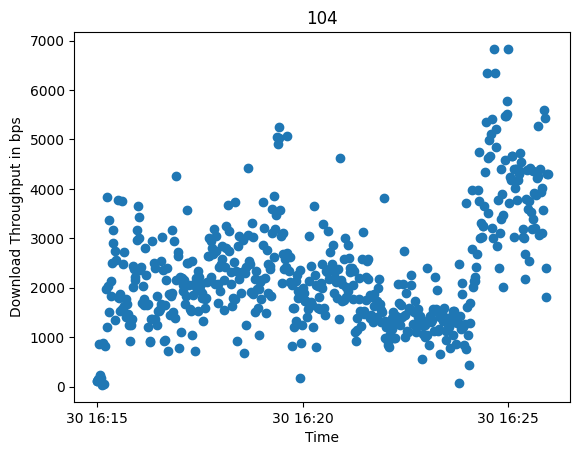

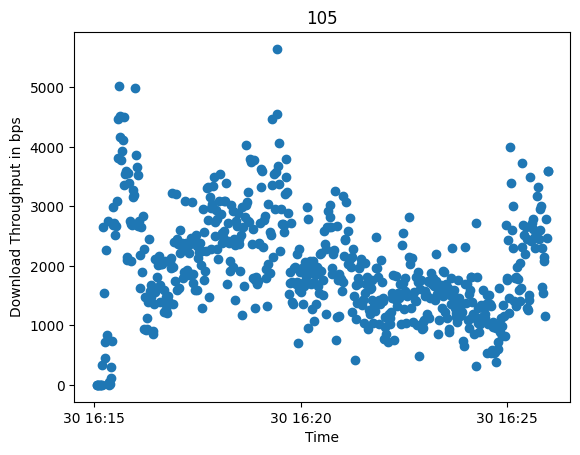

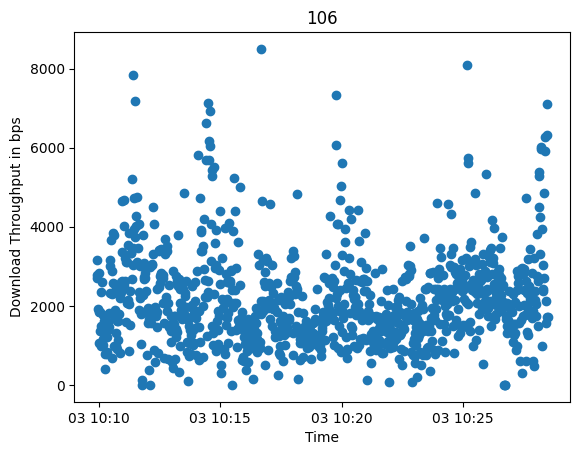

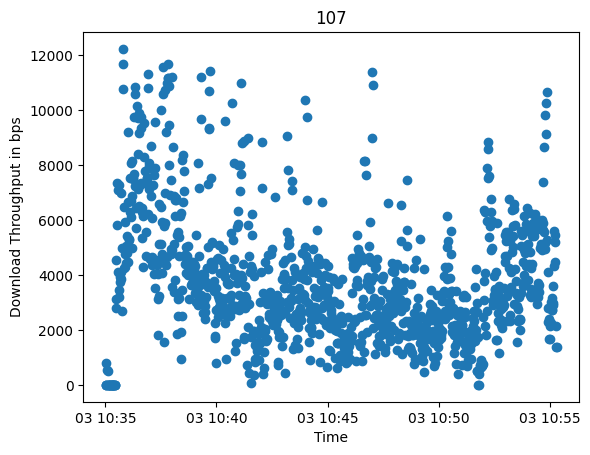

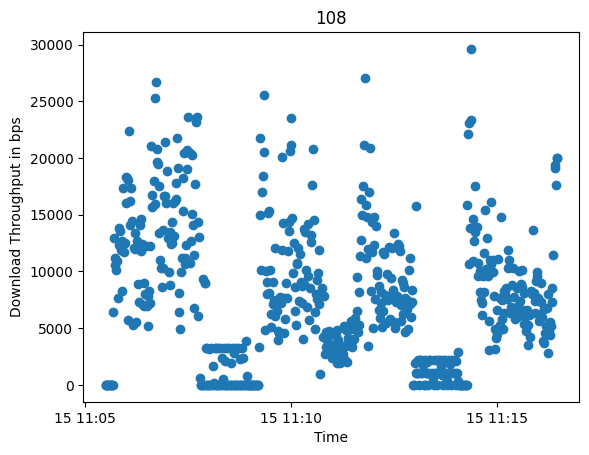

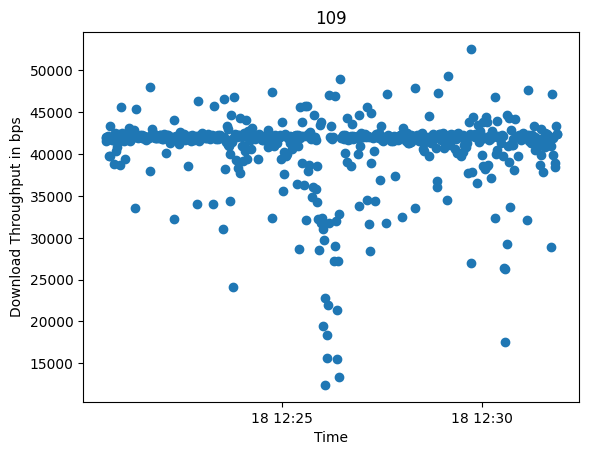

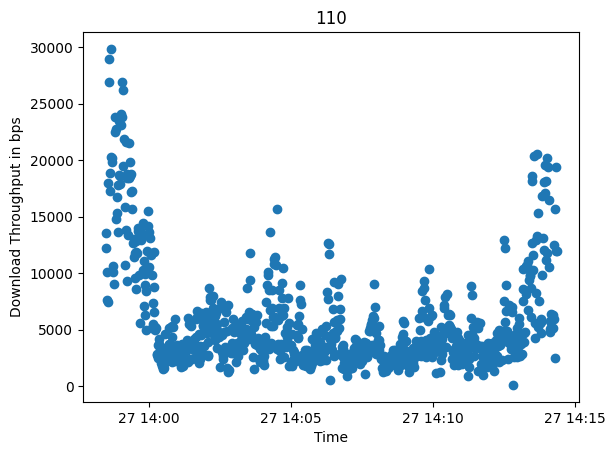

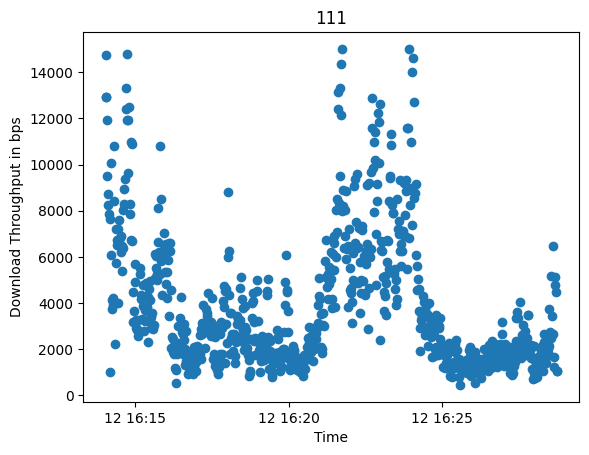

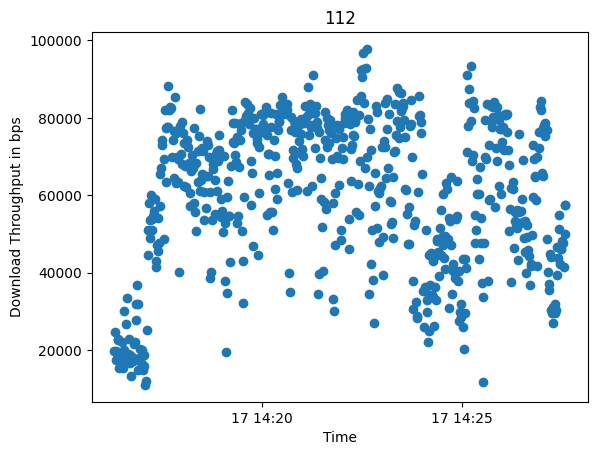

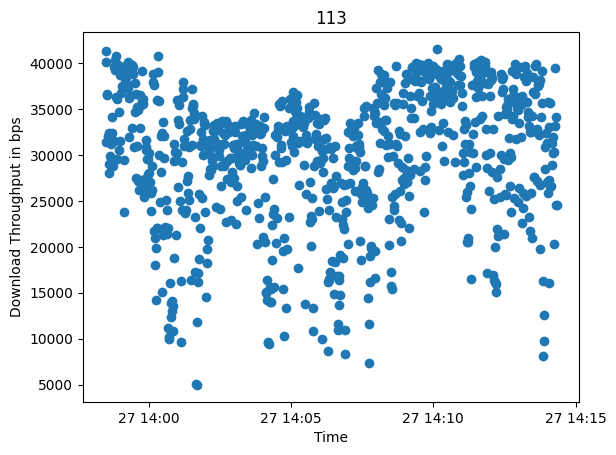

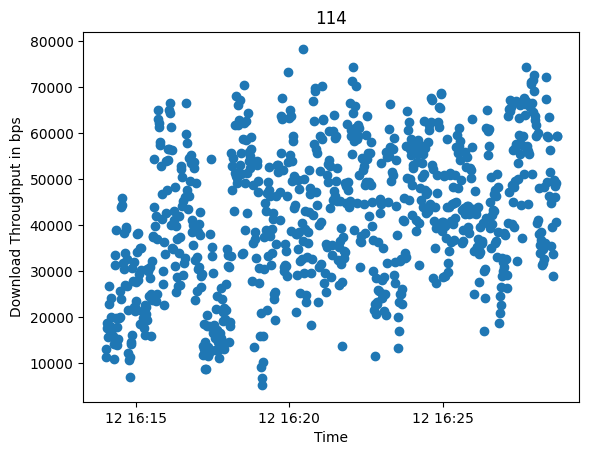

In [20]:
for i in range(100,115):
    x_points = static_data[(static_data["session"]==i)]["Timestamp"]
    y_points = static_data[(static_data["session"]==i)]["DL_bitrate"]
    fig, ax = plt.subplots()
    ax.scatter(x_points, y_points)
    ax.set_xlabel("Time")
    ax.set_ylabel("Download Throughput in bps")
    ax.set_title(str(i))
    plt.show()

### Some Observations
- There is a large variance the the download speeds between sessions.
- Assuming the workload was the same in each instance, this could be due to session taking places in different places, or a different times (e.g. peak user times might cause slower LTE speeds for 1 user)
- There is no clear overall pattern between sessions.

## Attempting to Identify trends Associated with Particular Cell Towers or Locations

In [21]:
cell_tower_groups = raw_data.copy().groupby(["ServingCell_Lat", "ServingCell_Lon"])

In [22]:
print(len(cell_tower_groups))

639


In [23]:
tower_grouped_data = pd.DataFrame()
i = 0
for name, group in cell_tower_groups:
    group["cell_tower"] = i
    tower_grouped_data = pd.concat([tower_grouped_data, group])

In [24]:
print(len(pd.unique(tower_grouped_data["session"].sort_values())))

132


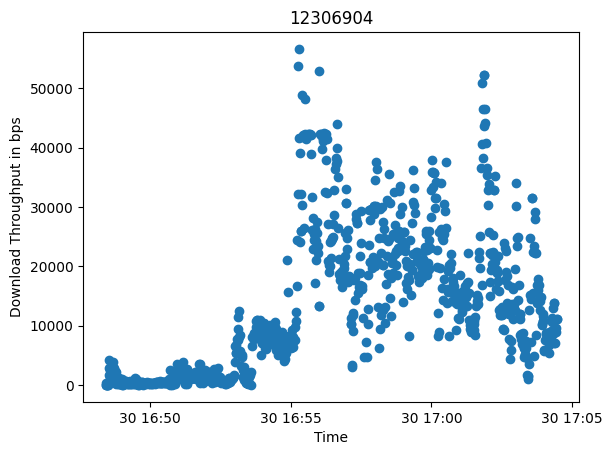

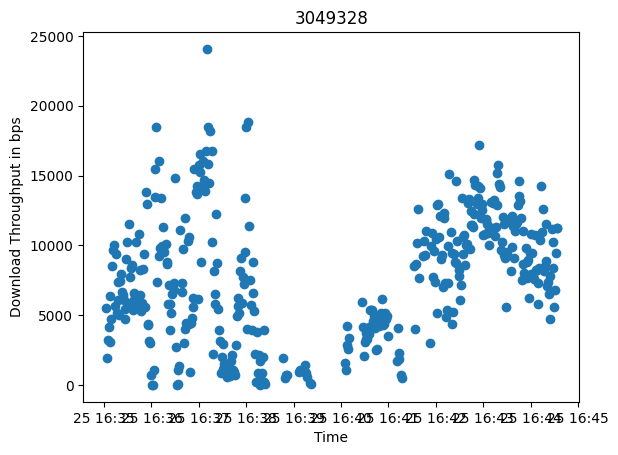

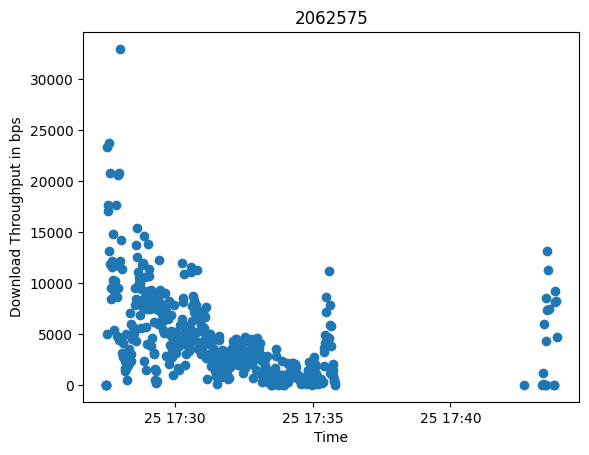

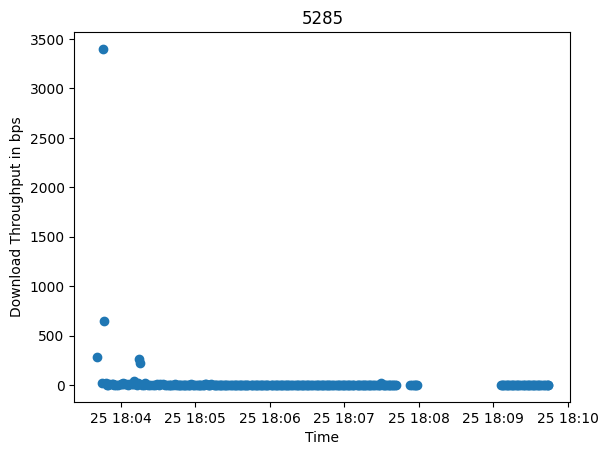

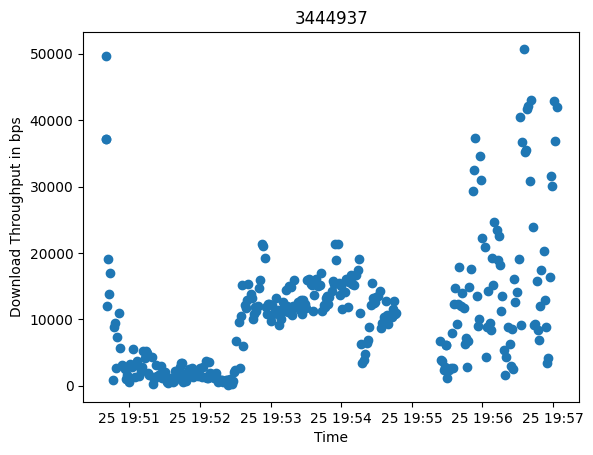

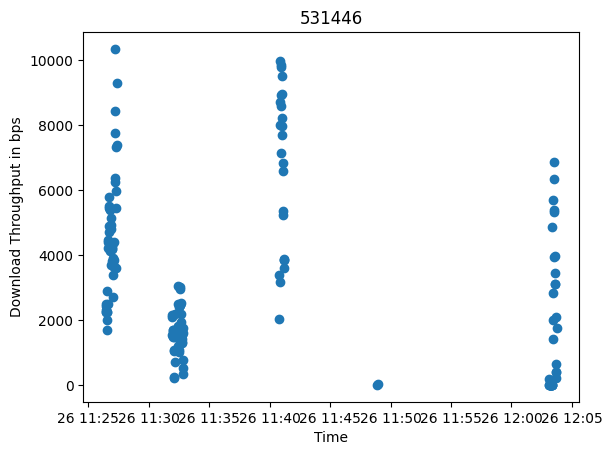

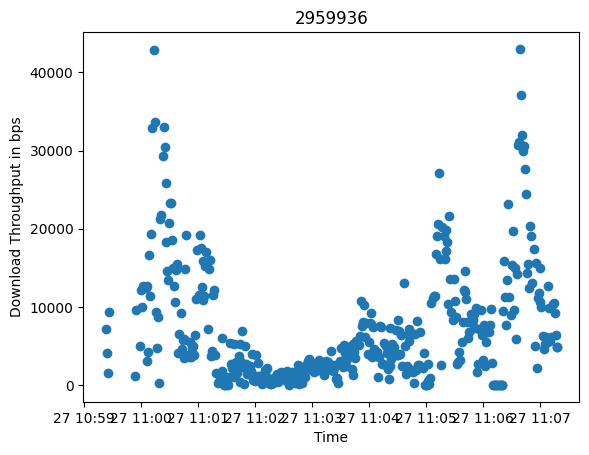

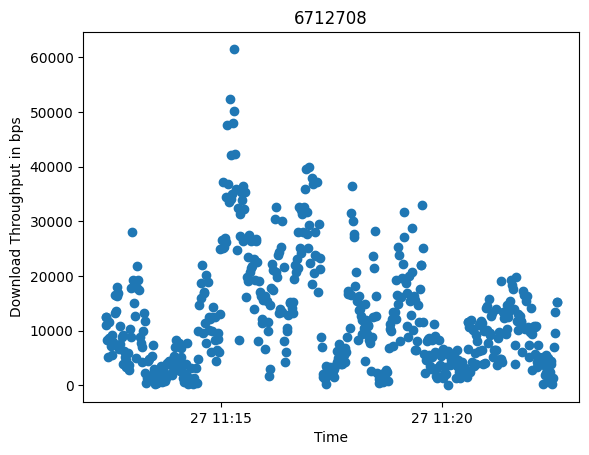

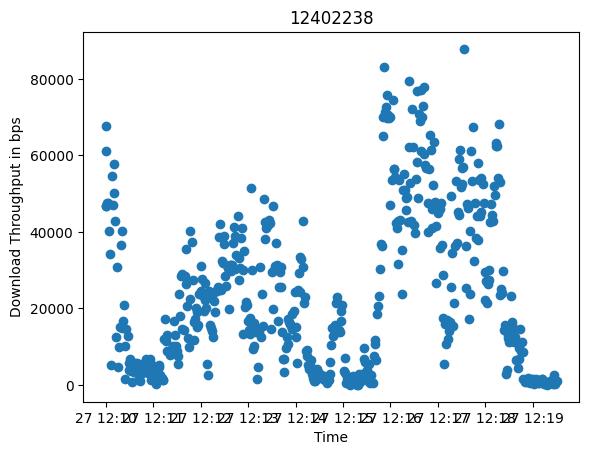

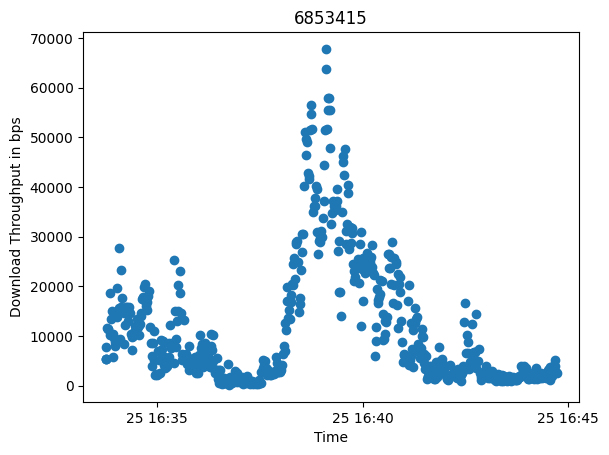

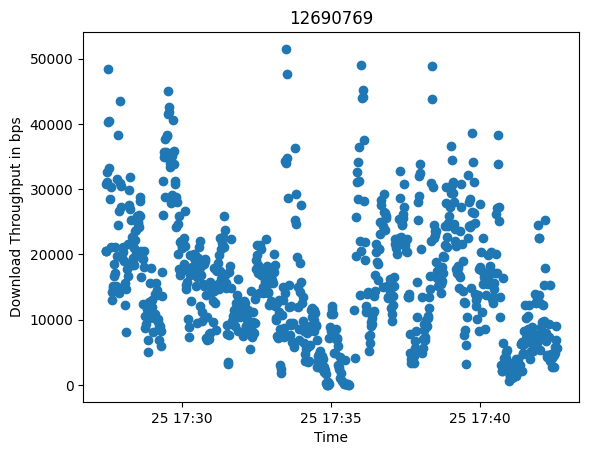

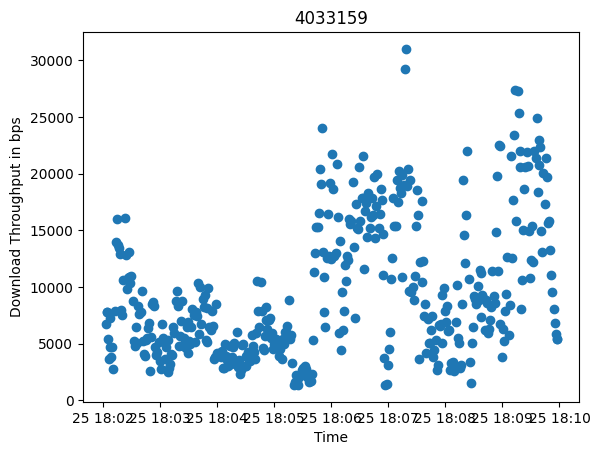

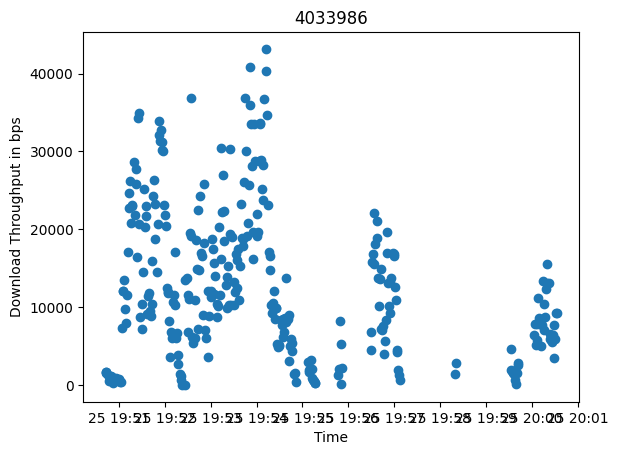

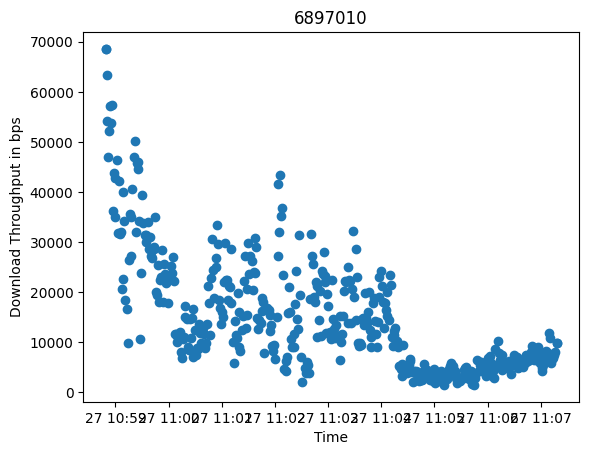

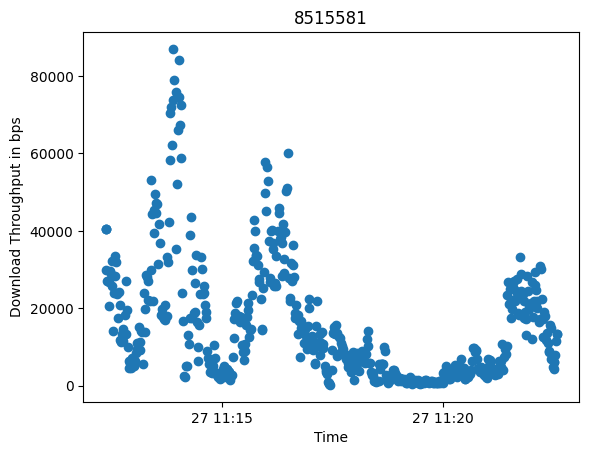

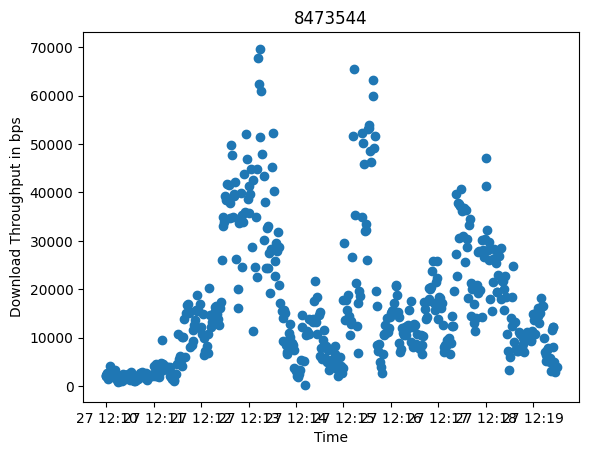

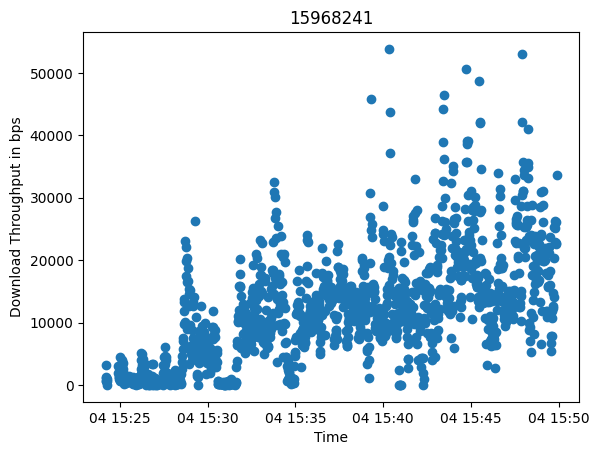

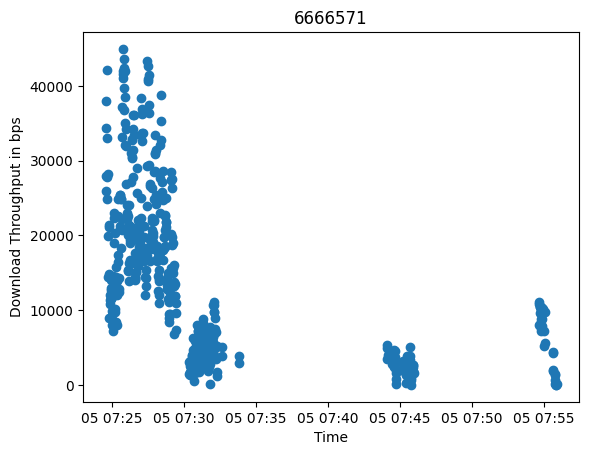

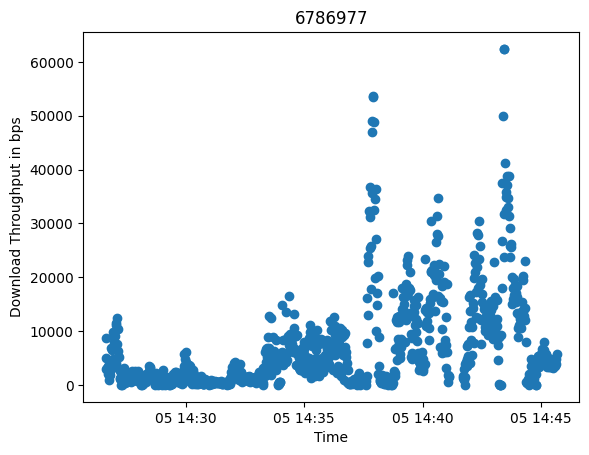

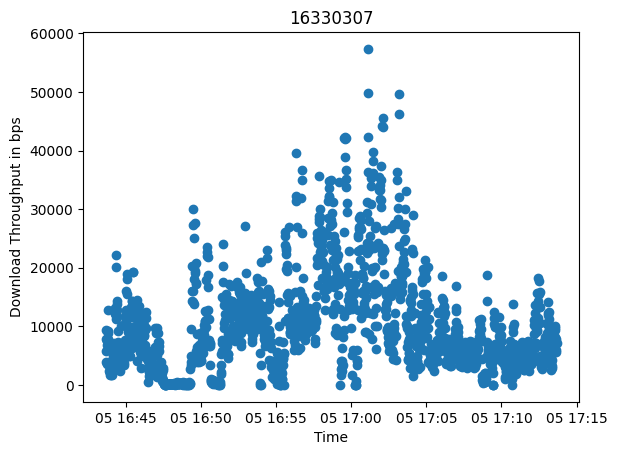

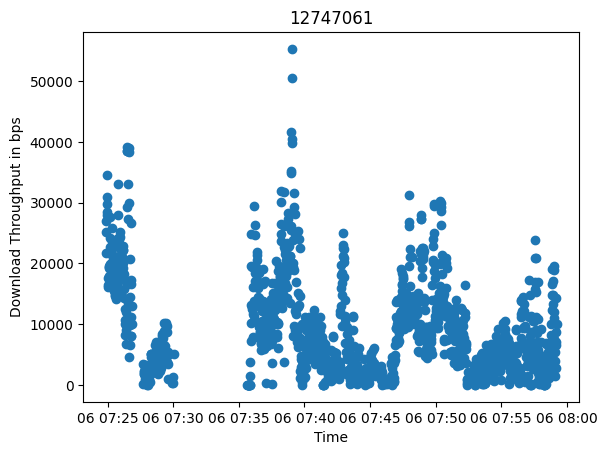

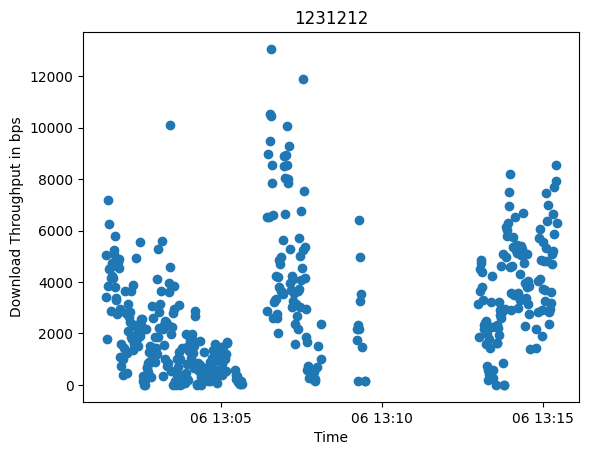

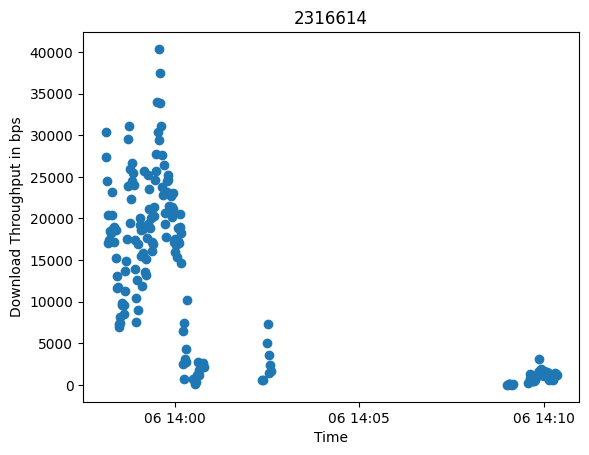

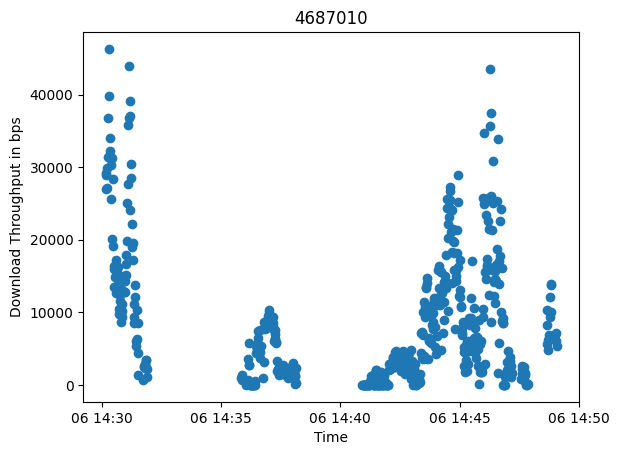

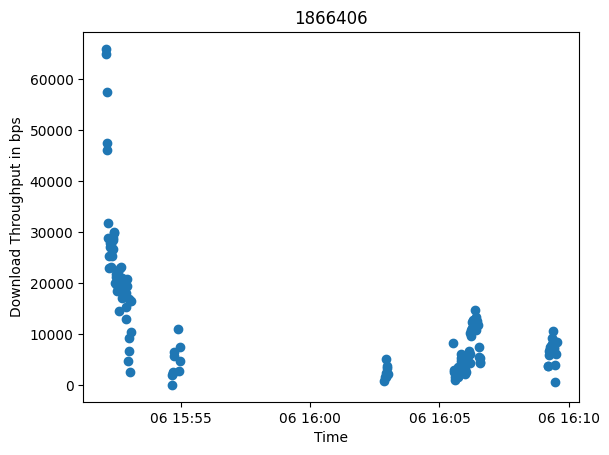

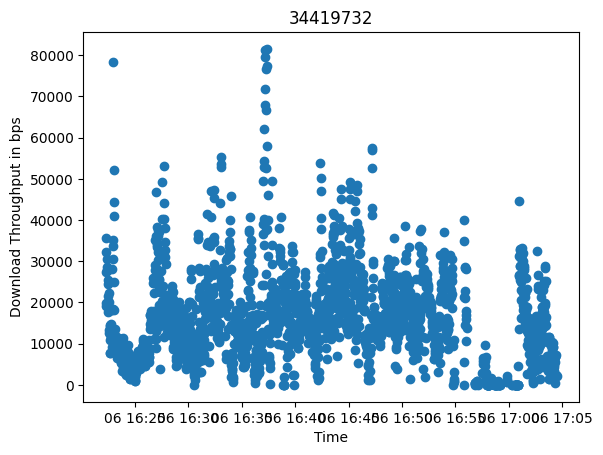

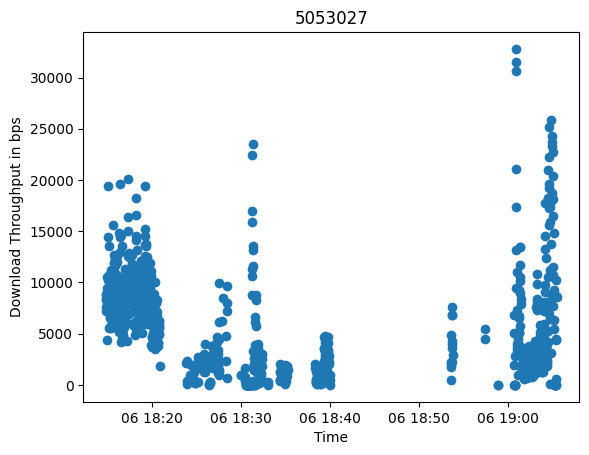

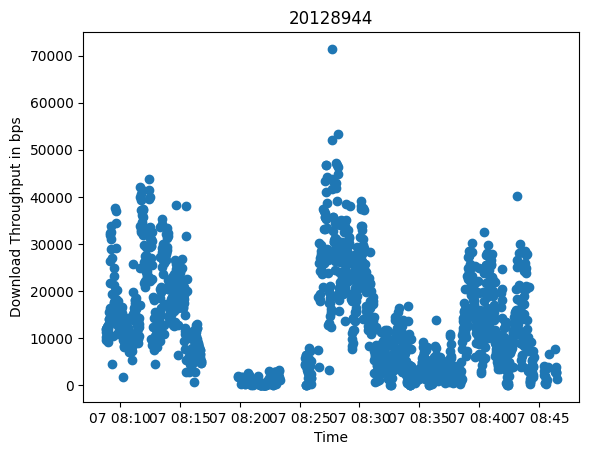

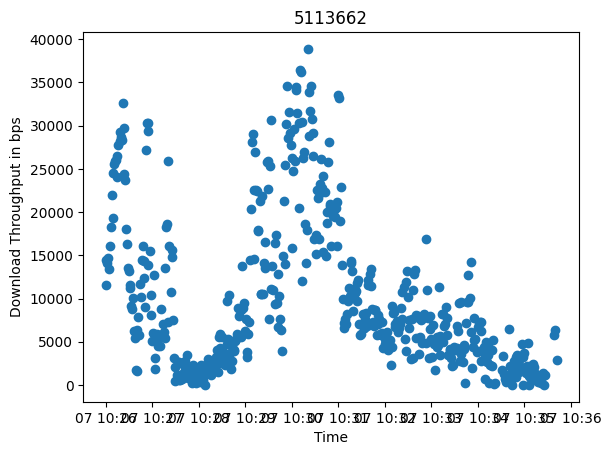

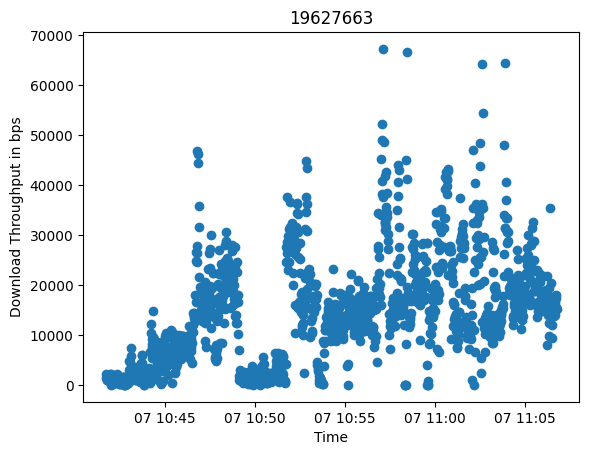

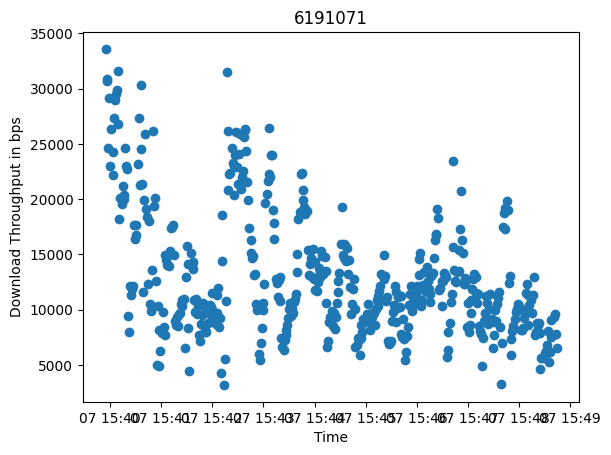

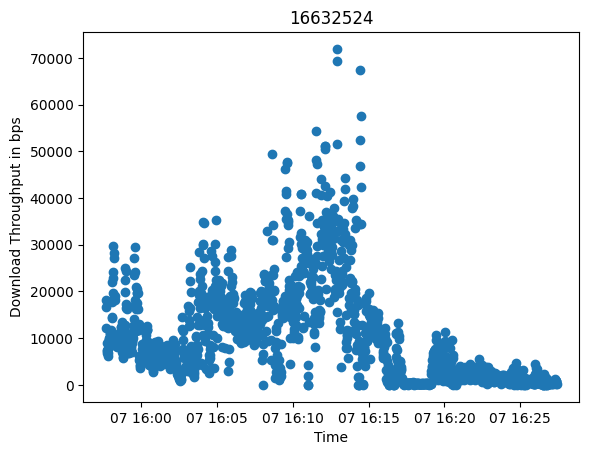

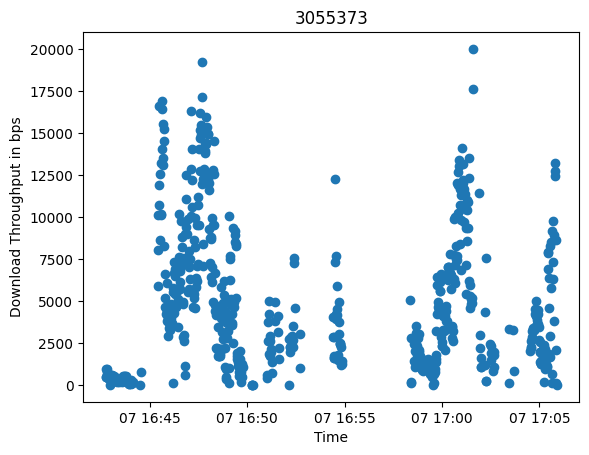

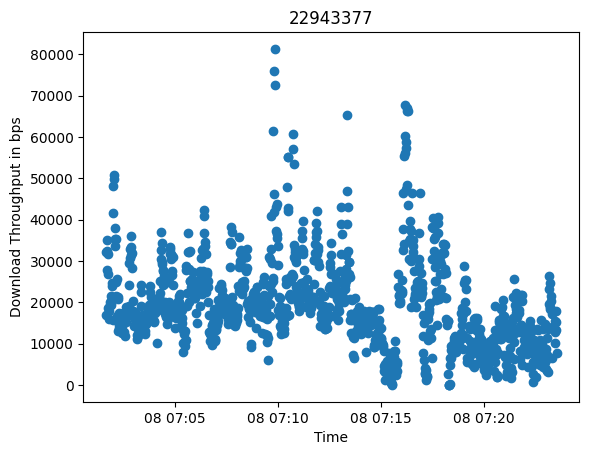

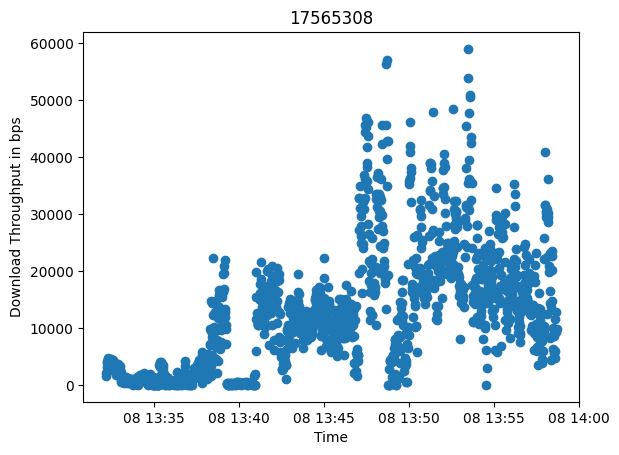

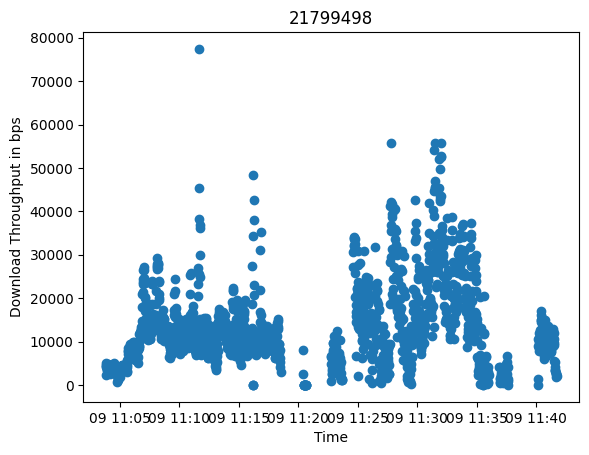

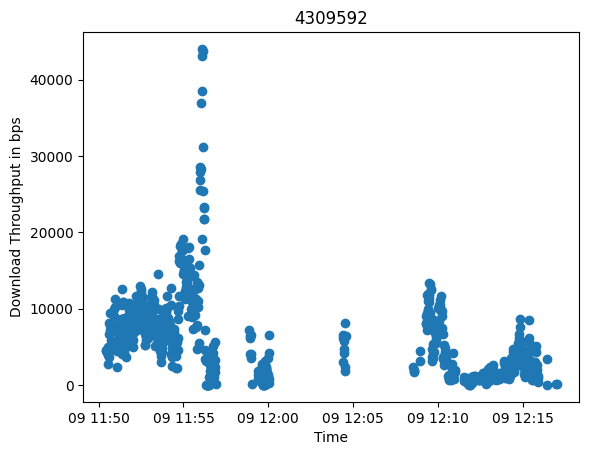

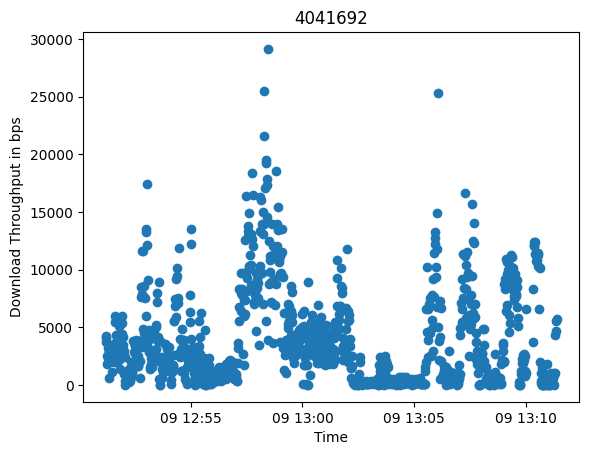

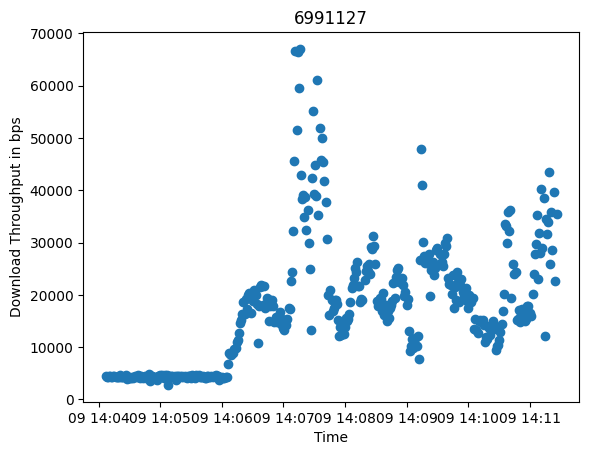

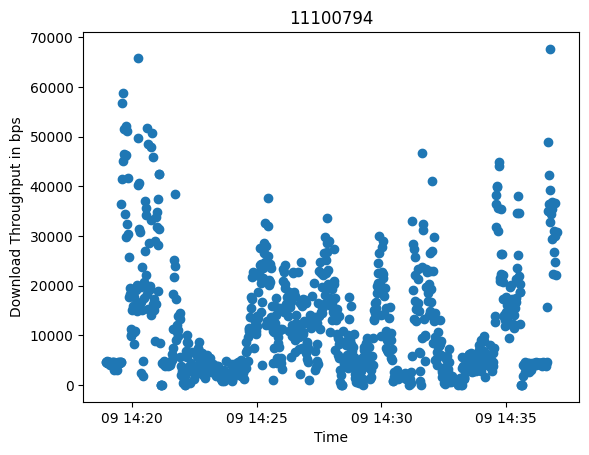

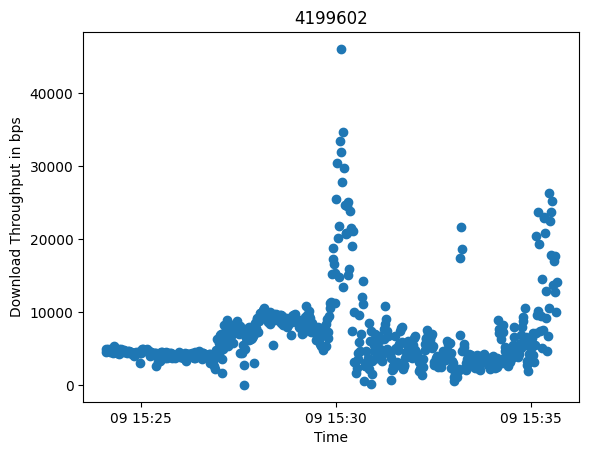

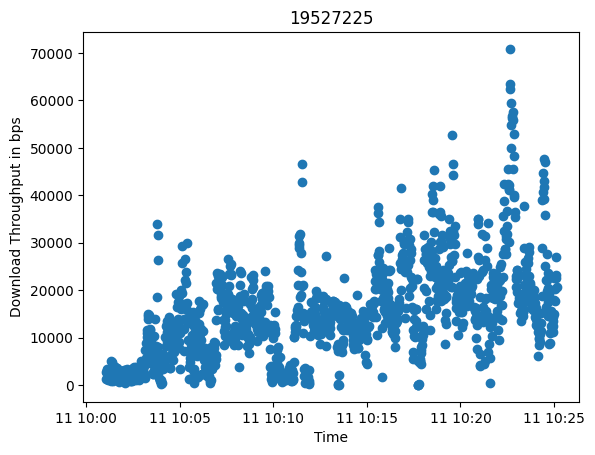

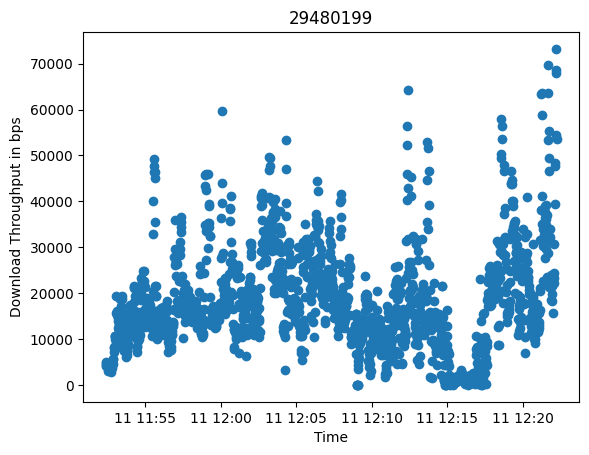

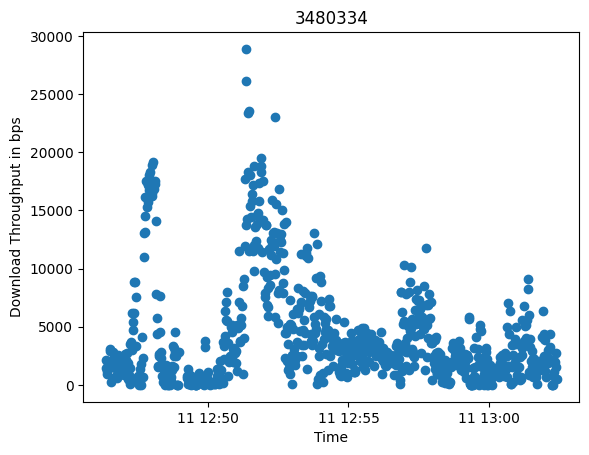

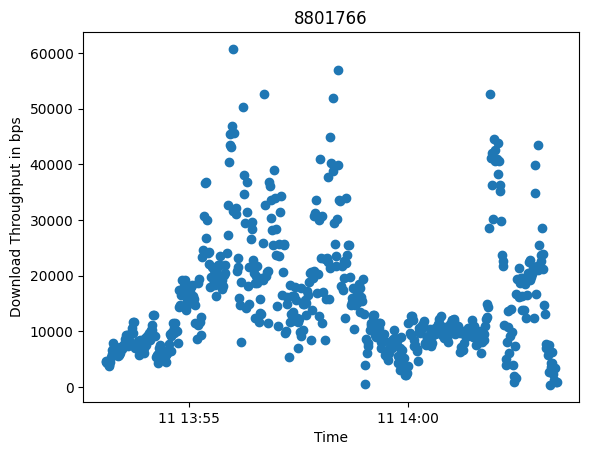

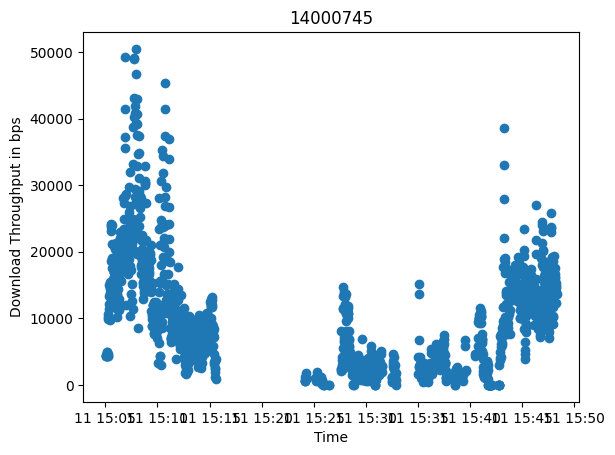

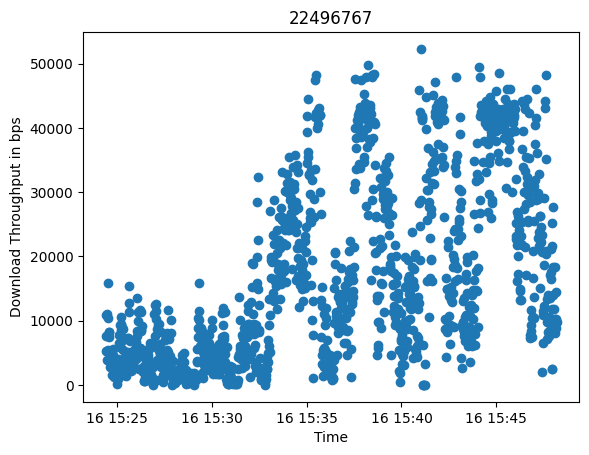

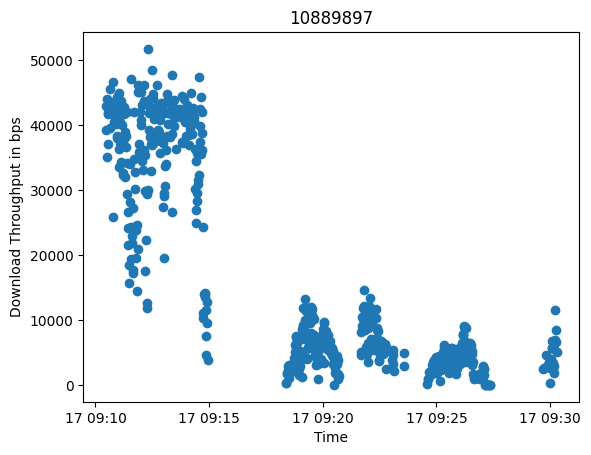

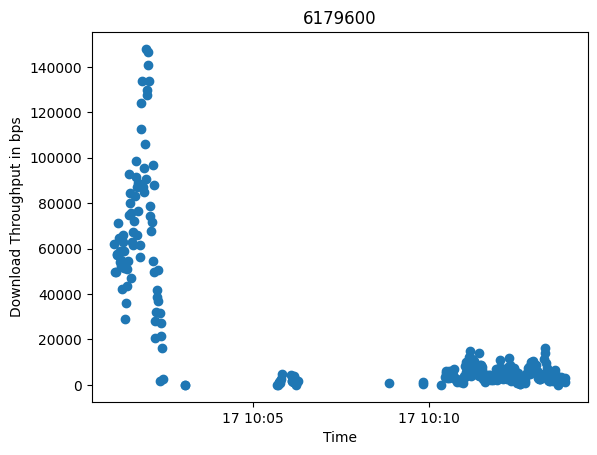

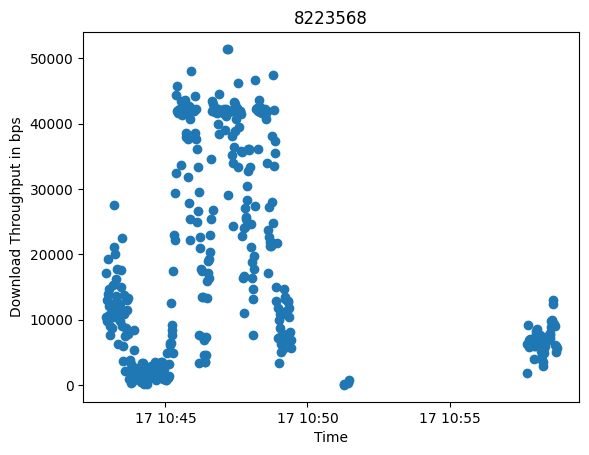

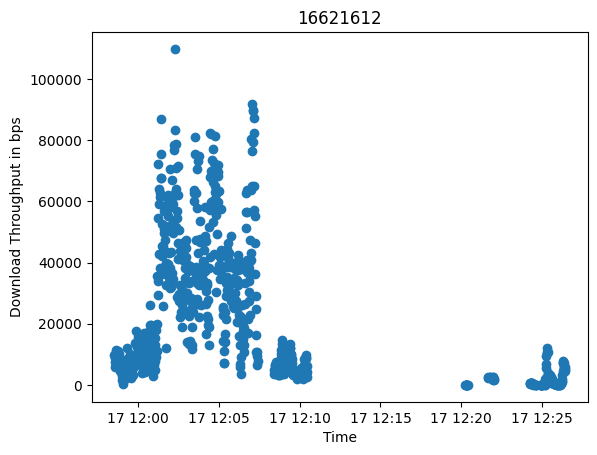

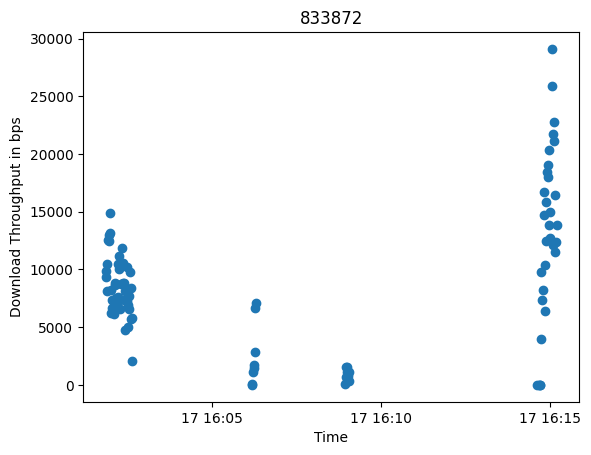

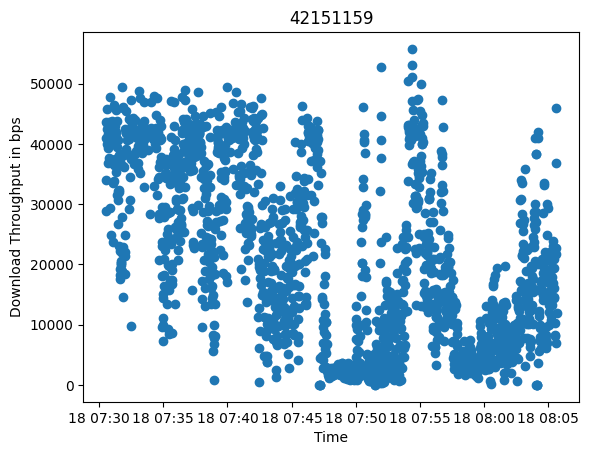

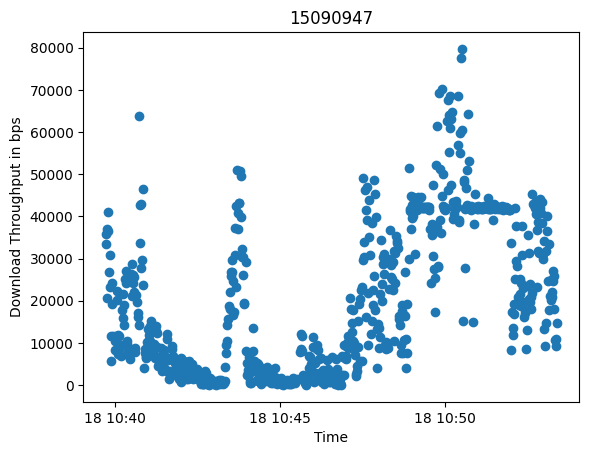

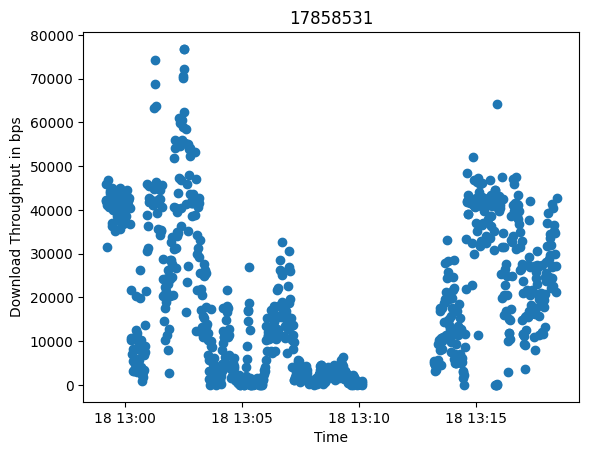

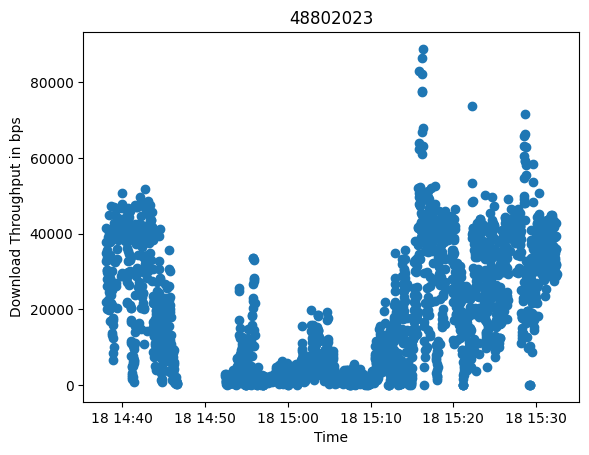

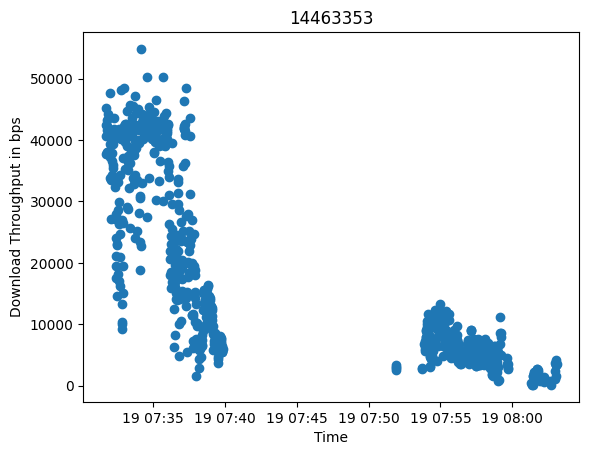

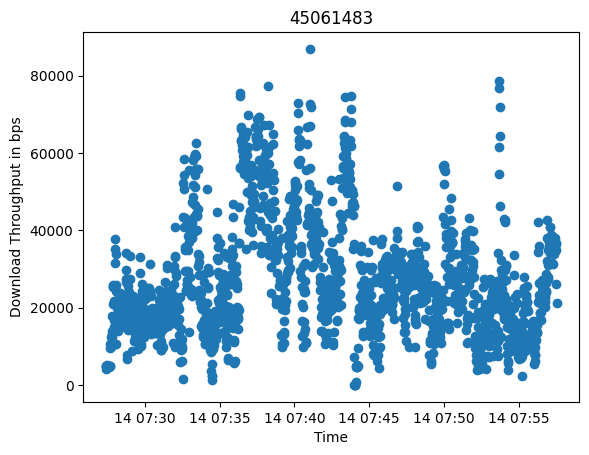

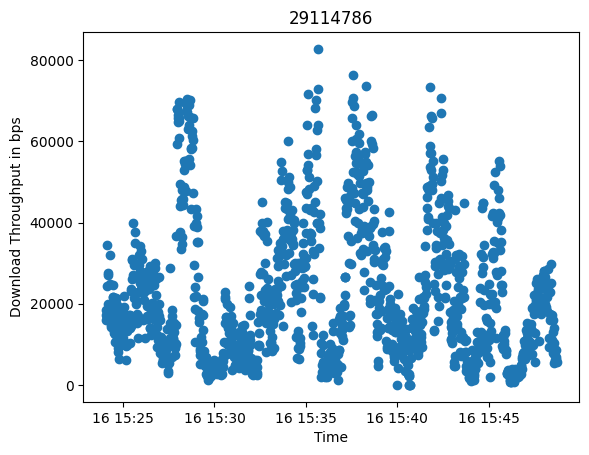

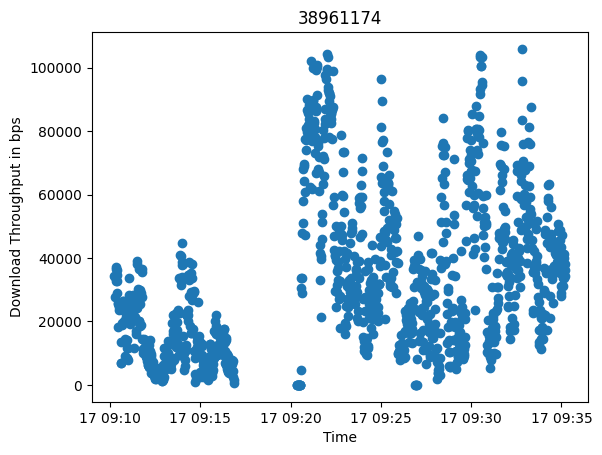

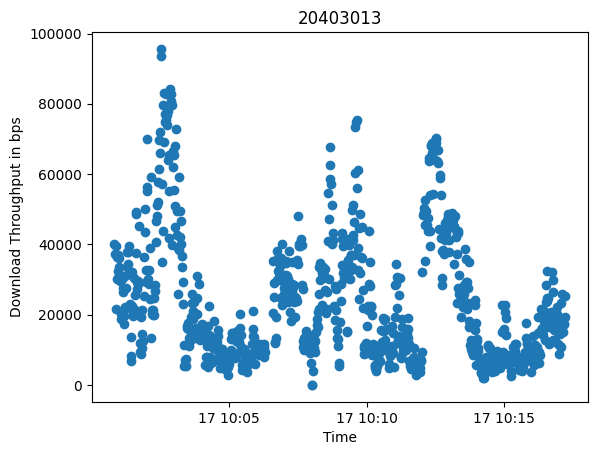

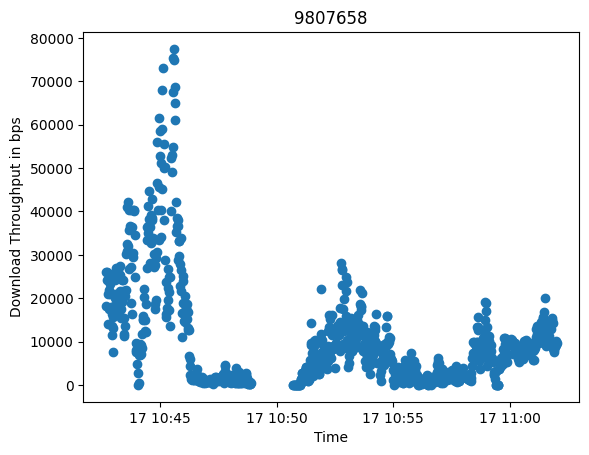

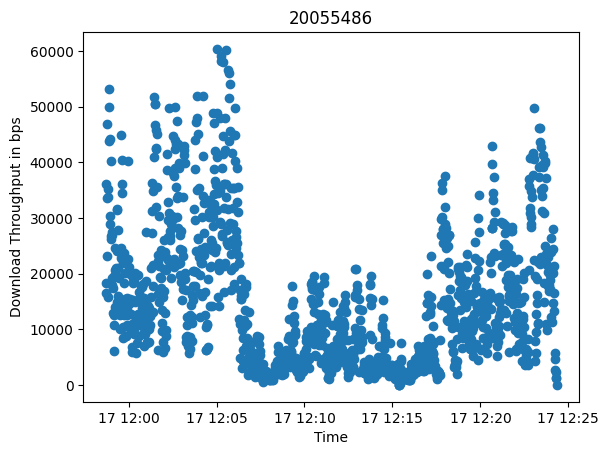

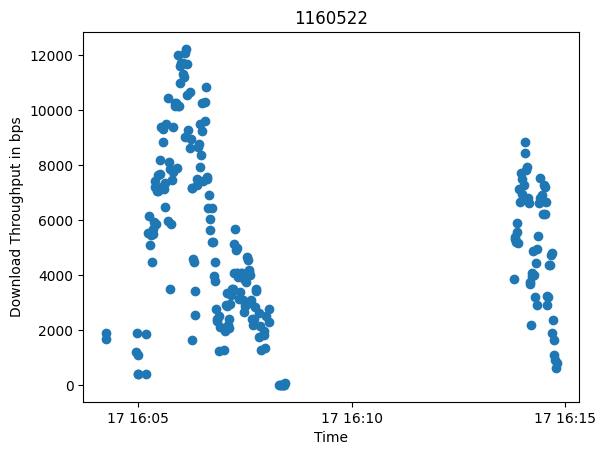

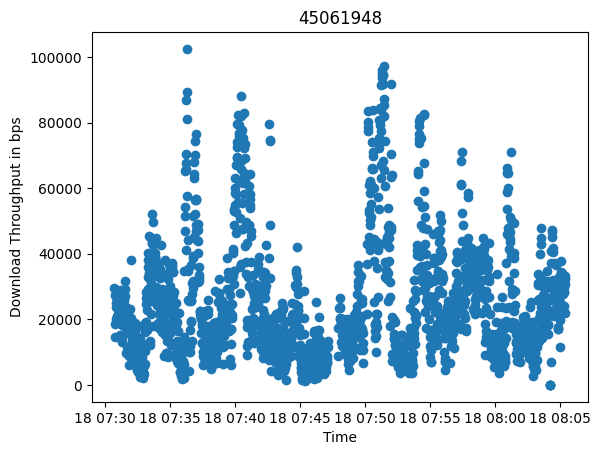

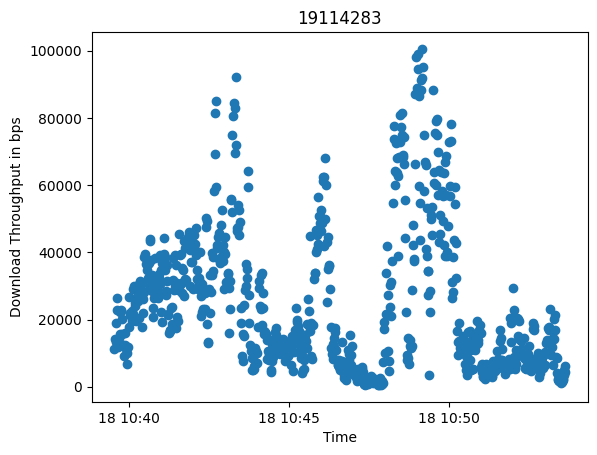

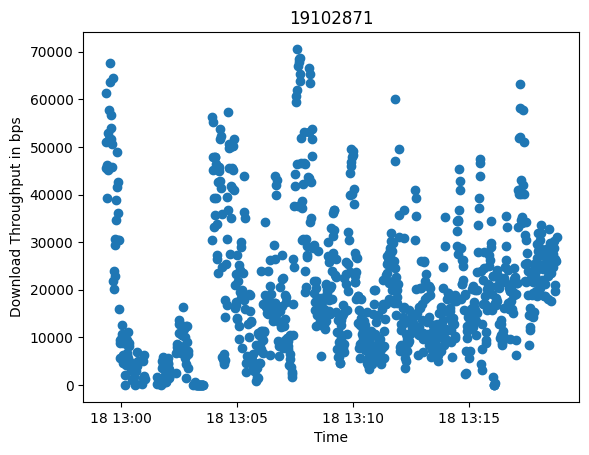

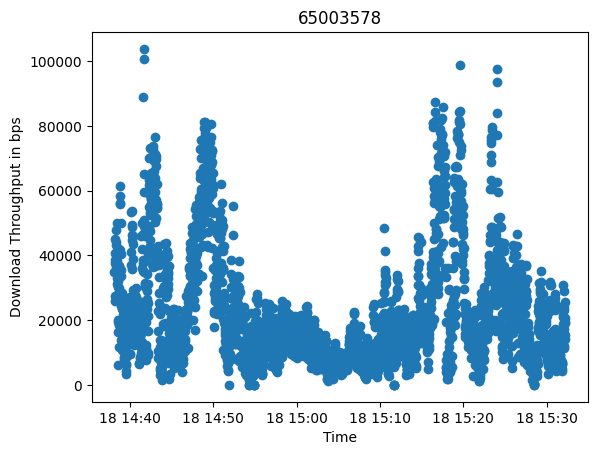

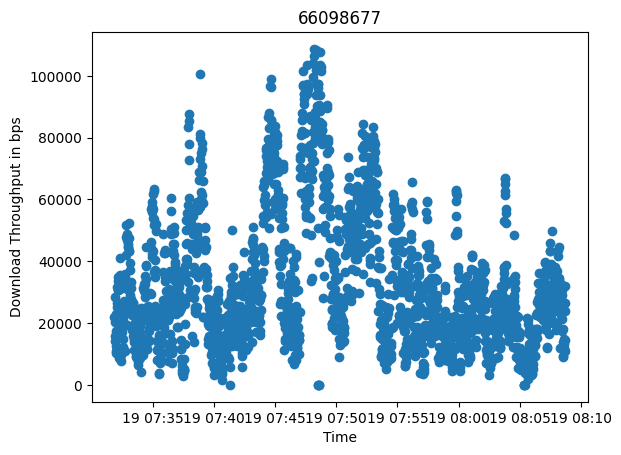

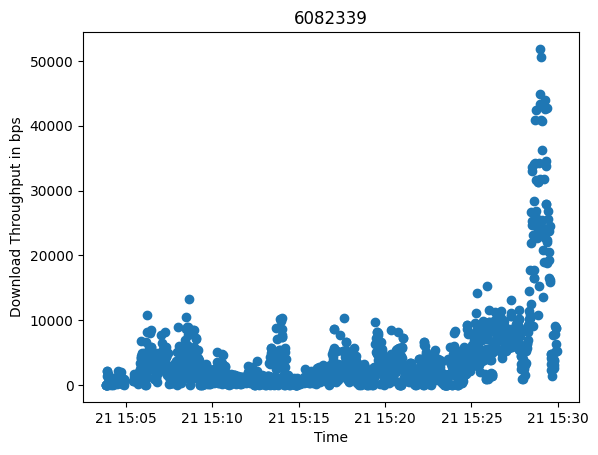

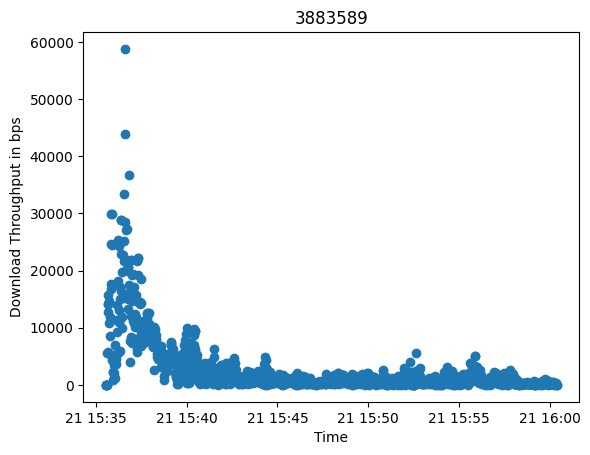

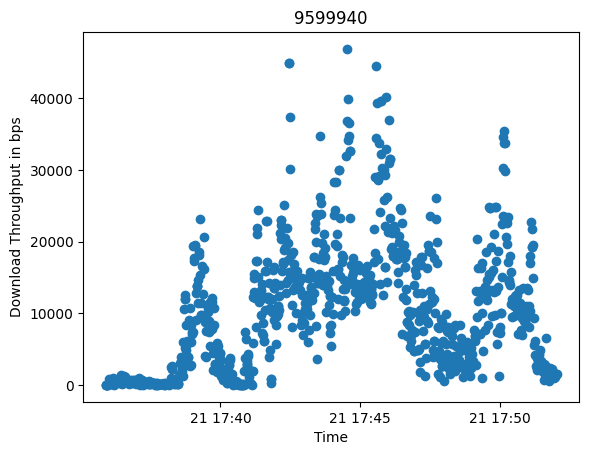

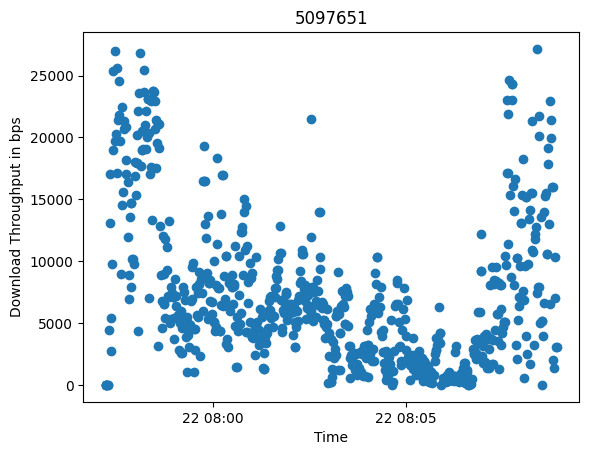

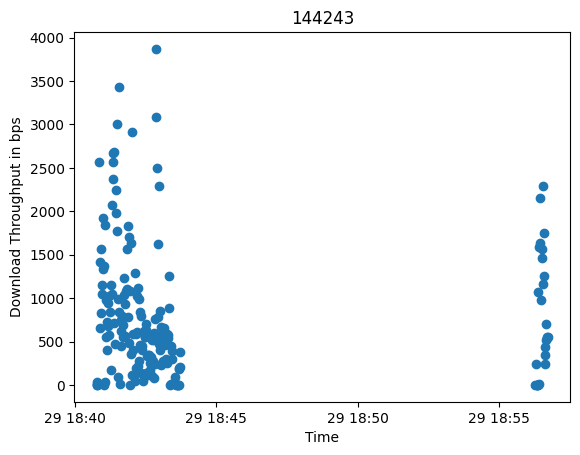

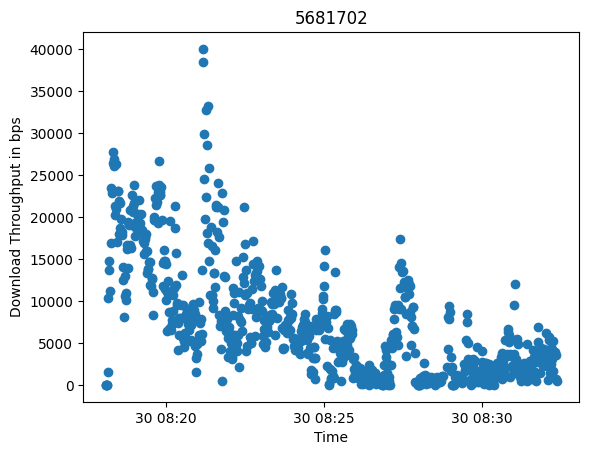

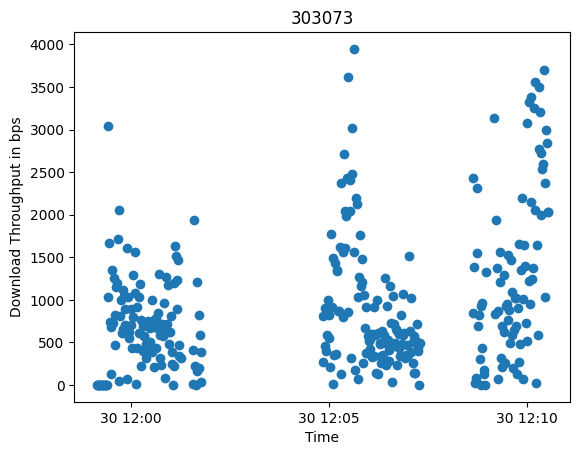

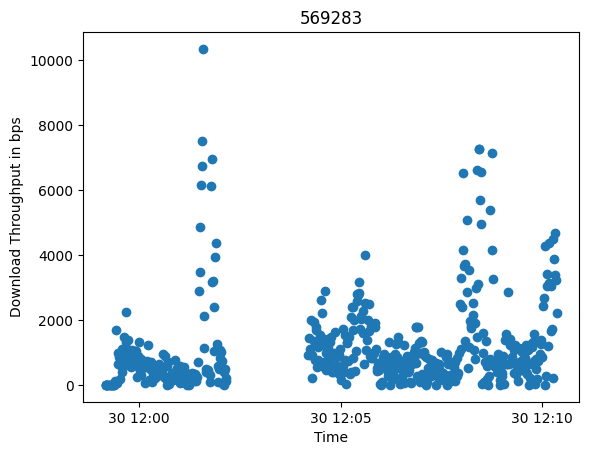

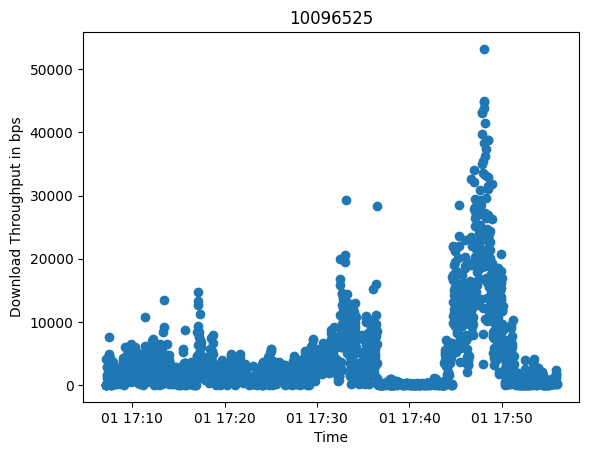

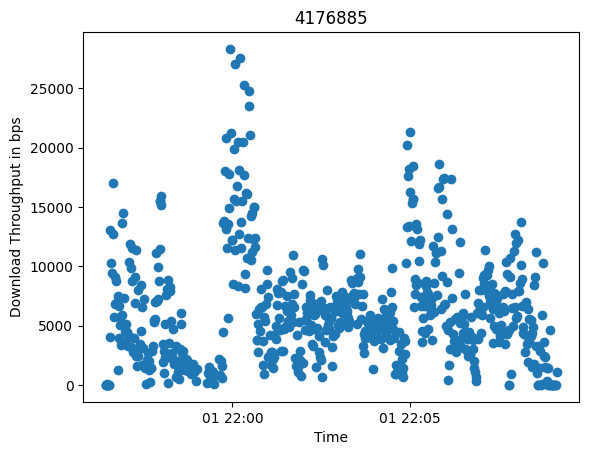

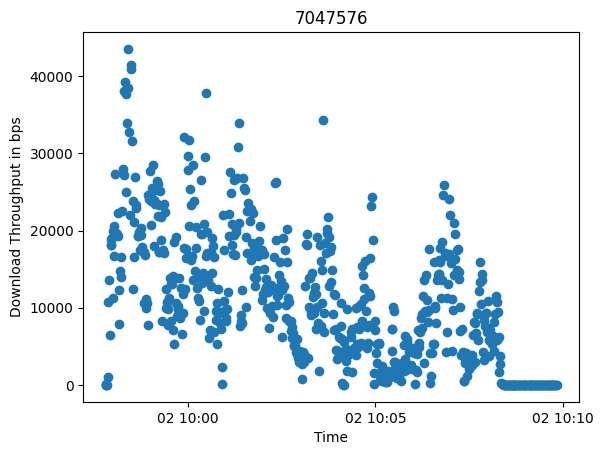

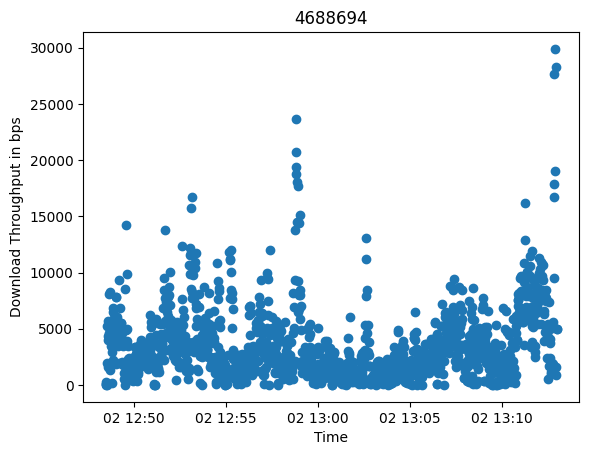

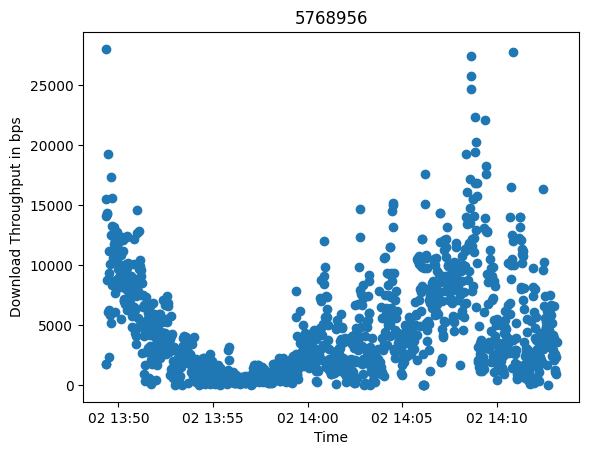

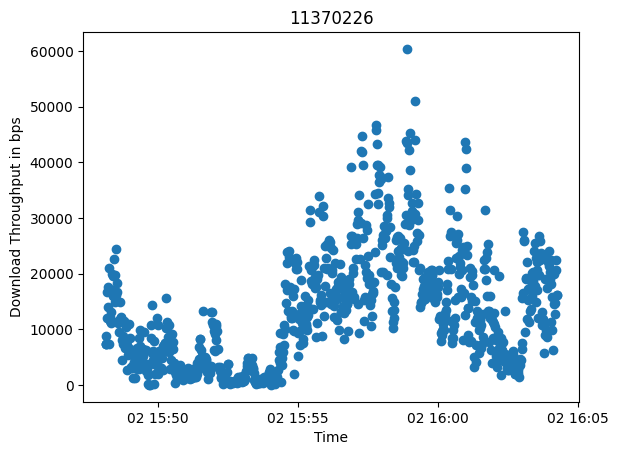

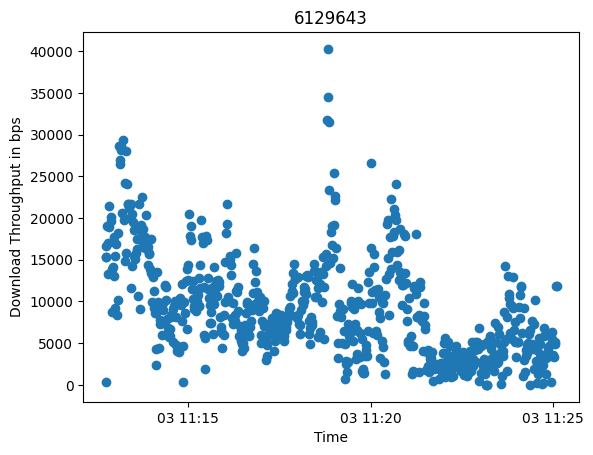

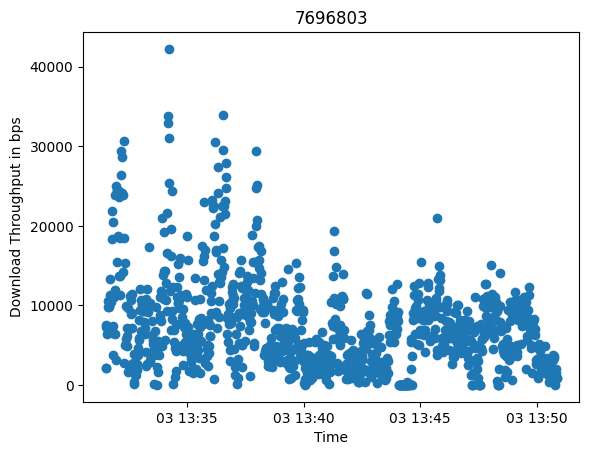

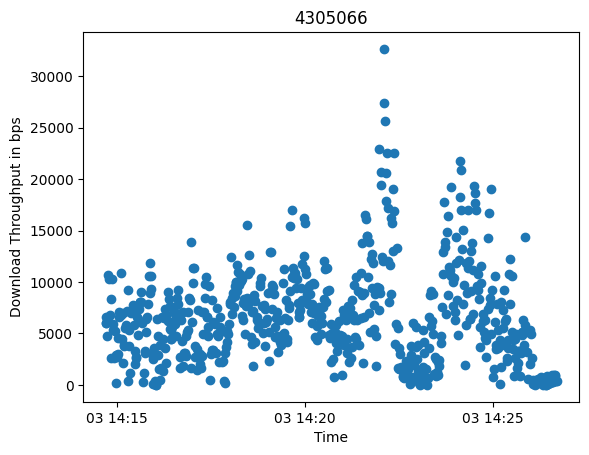

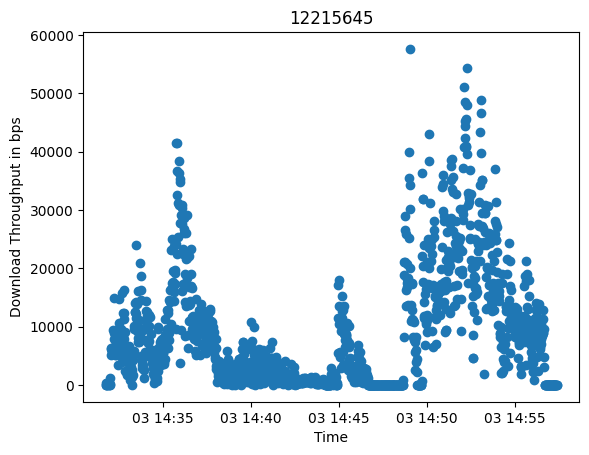

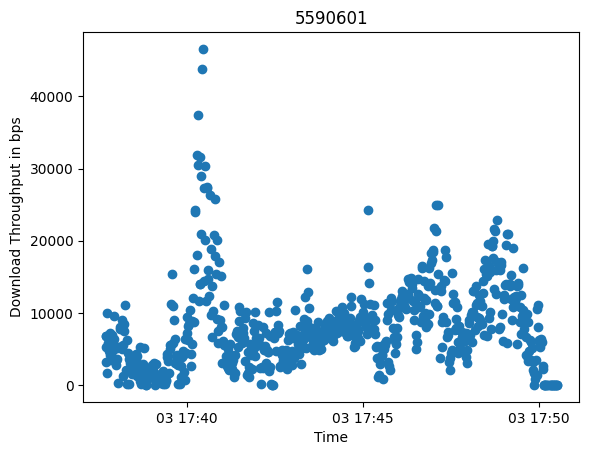

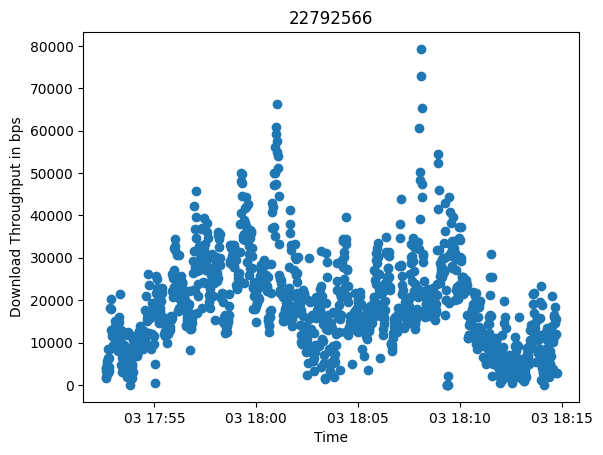

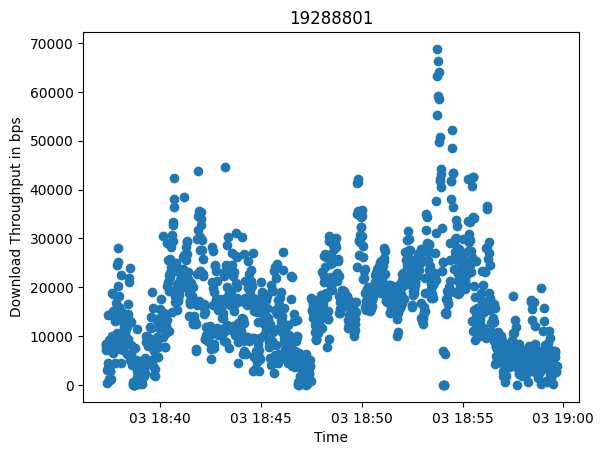

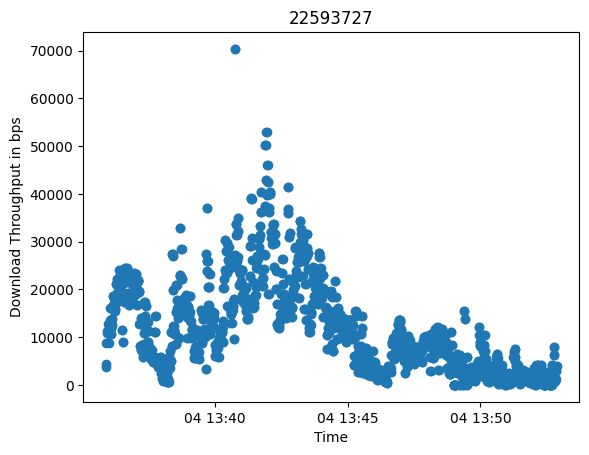

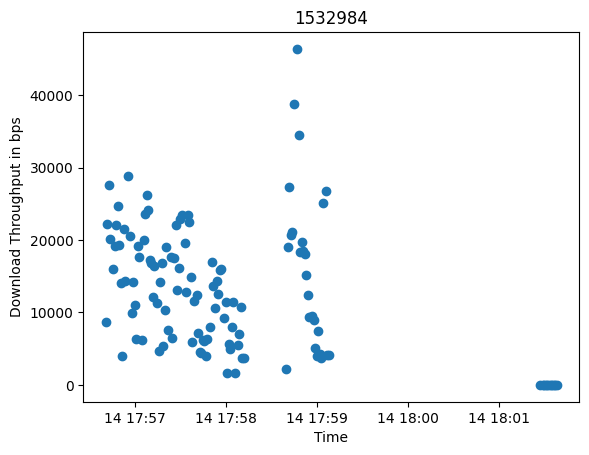

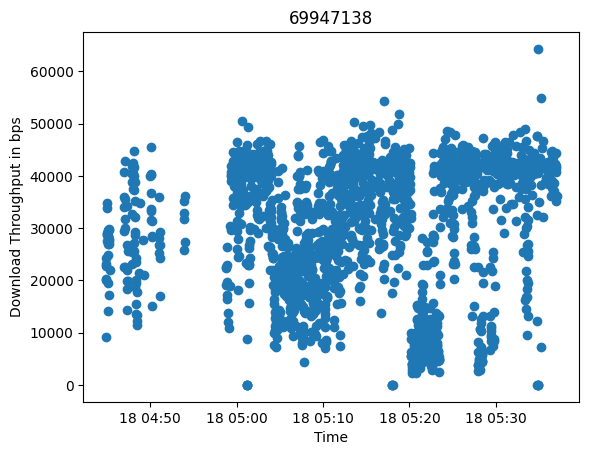

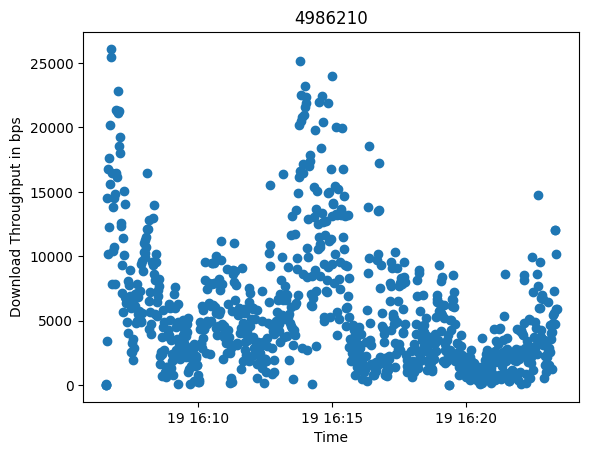

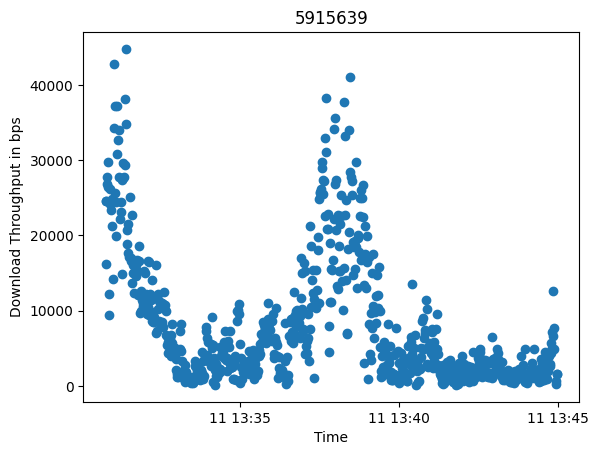

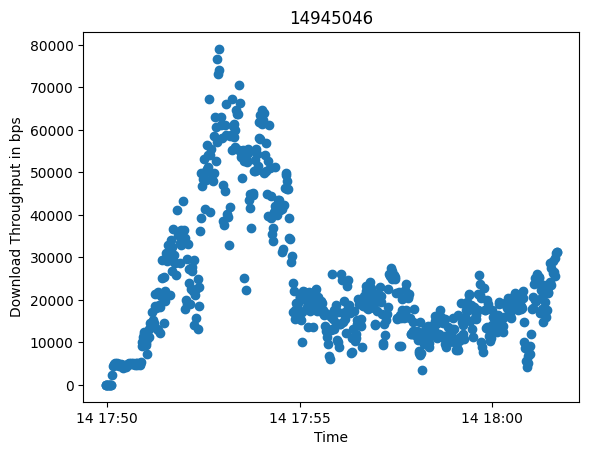

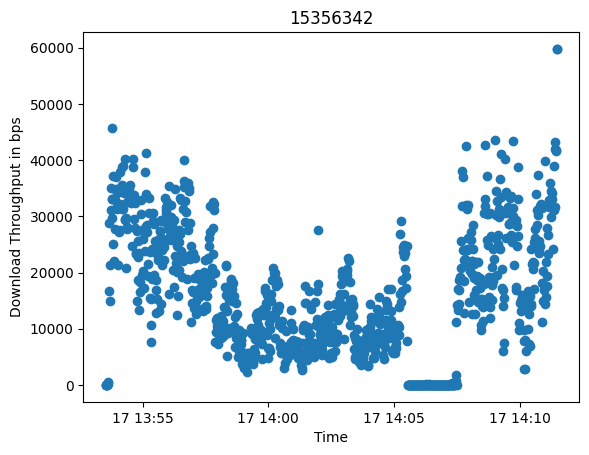

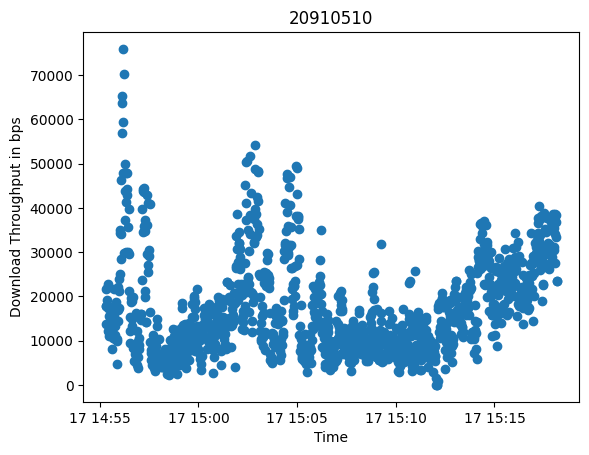

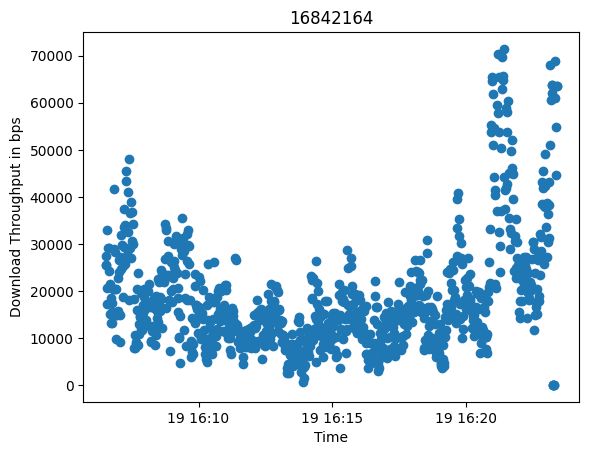

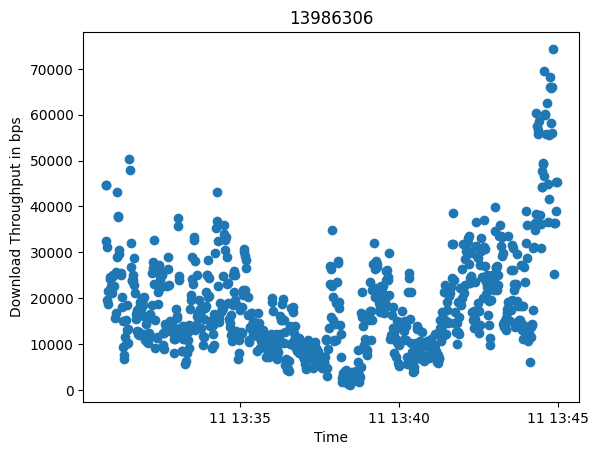

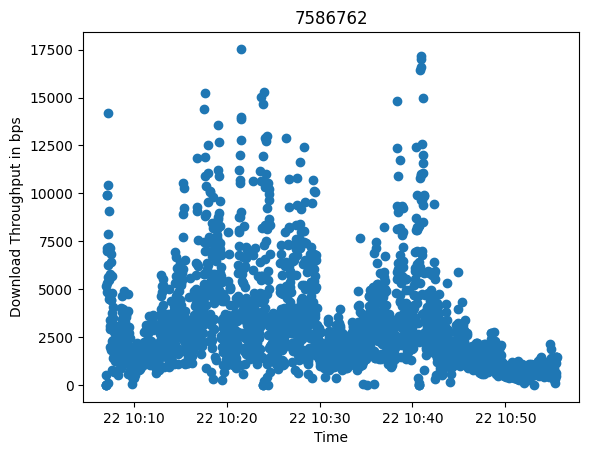

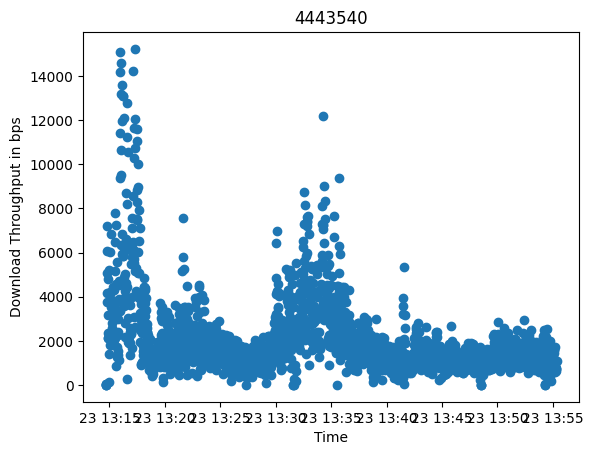

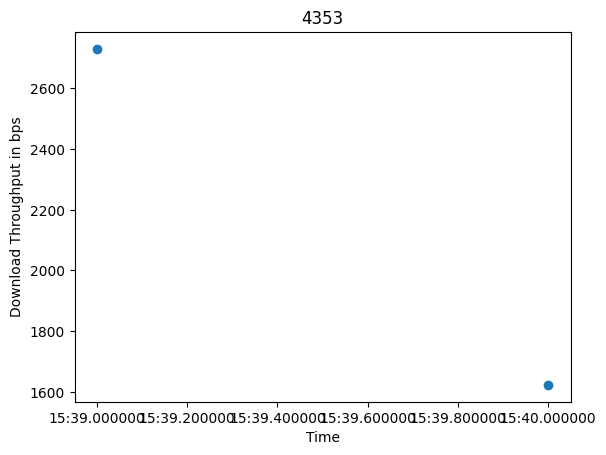

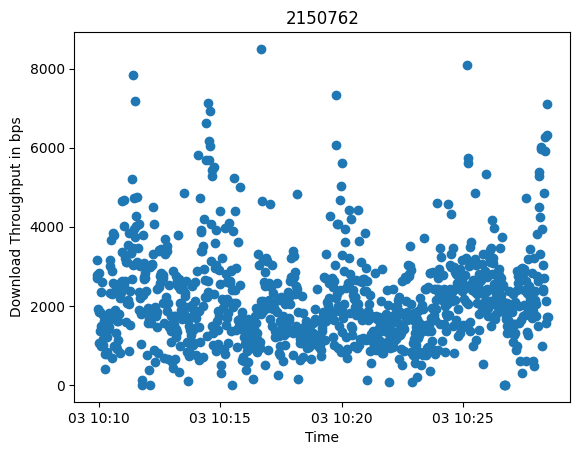

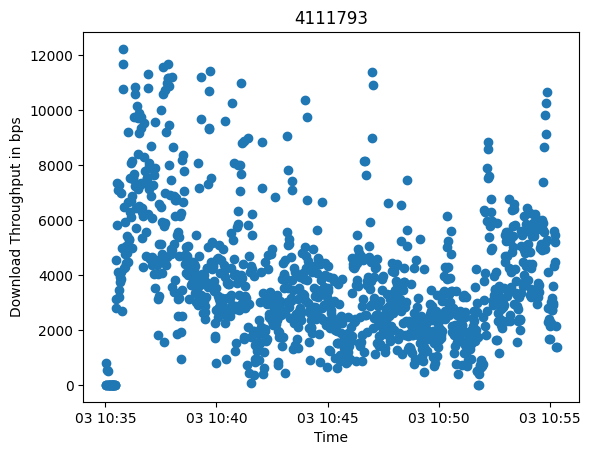

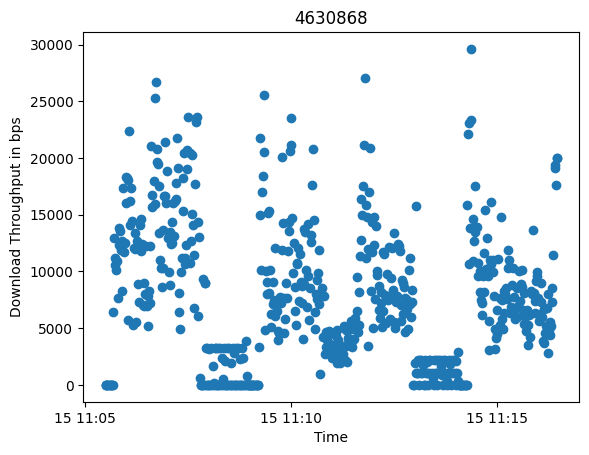

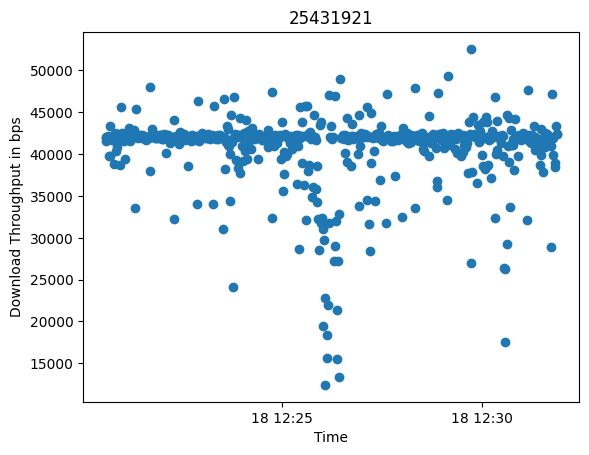

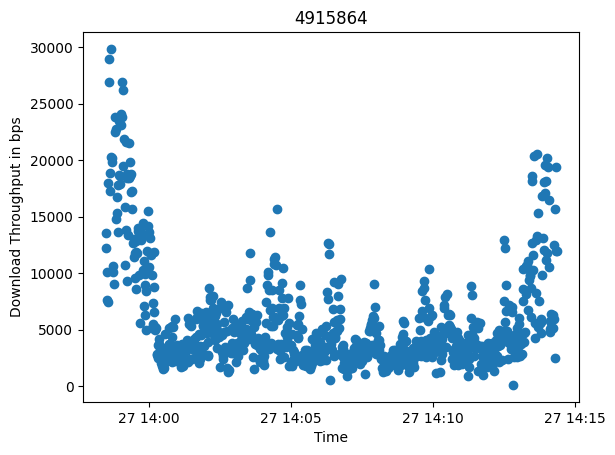

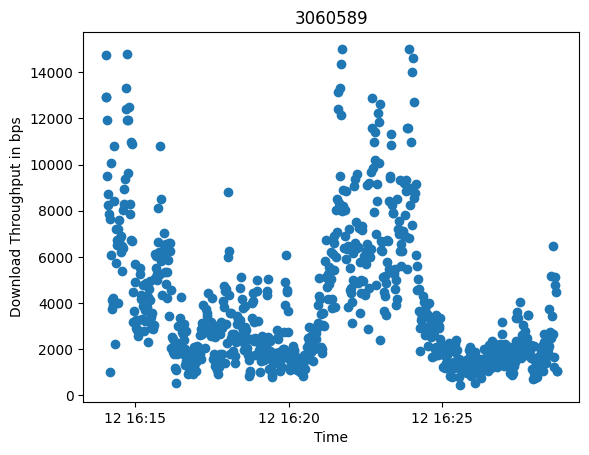

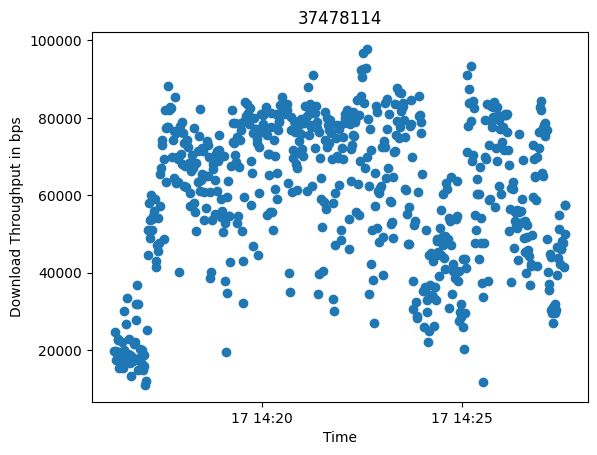

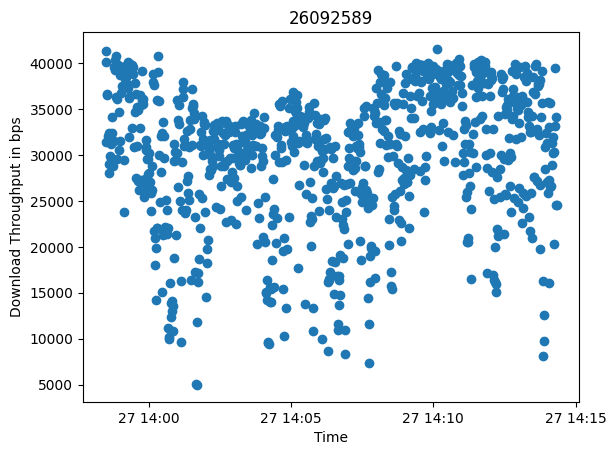

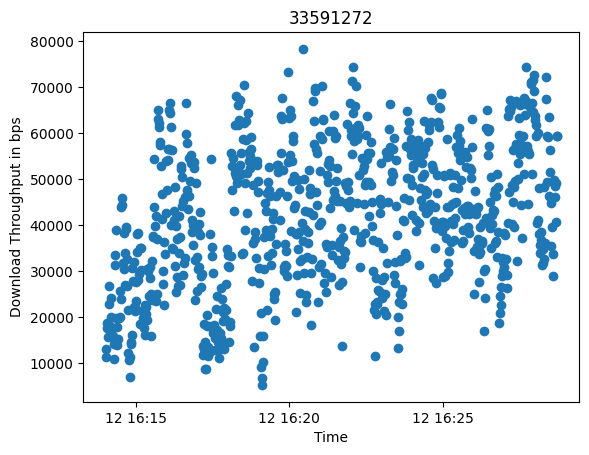

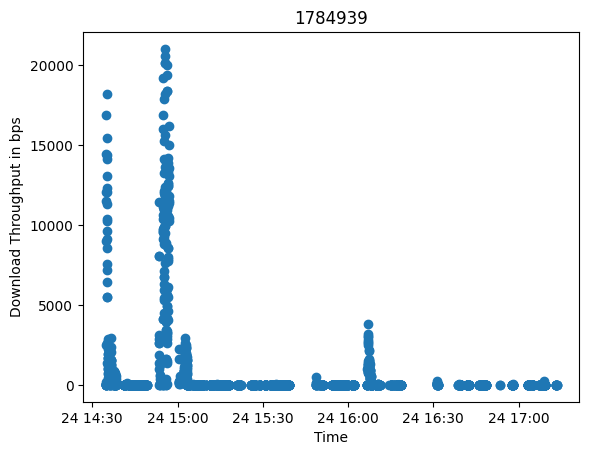

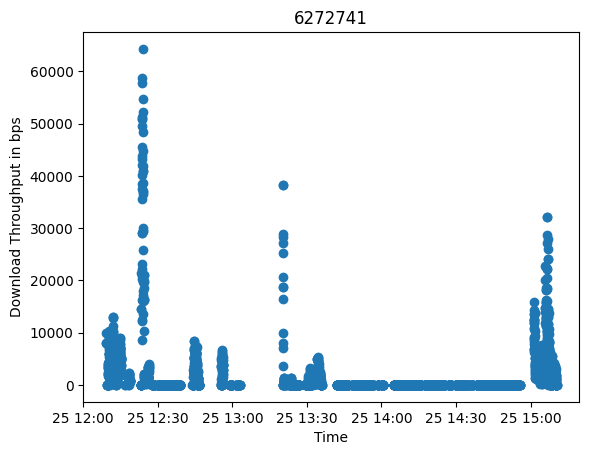

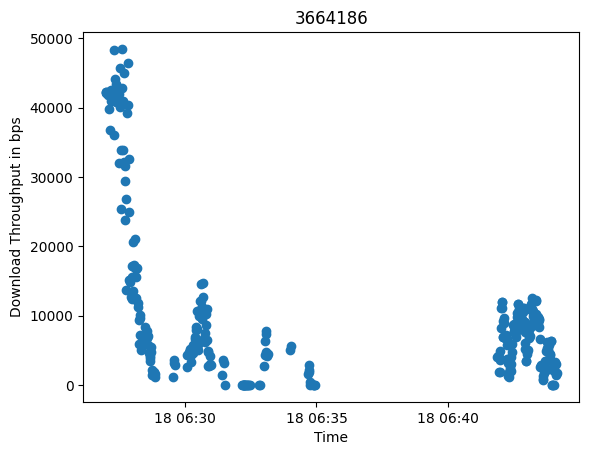

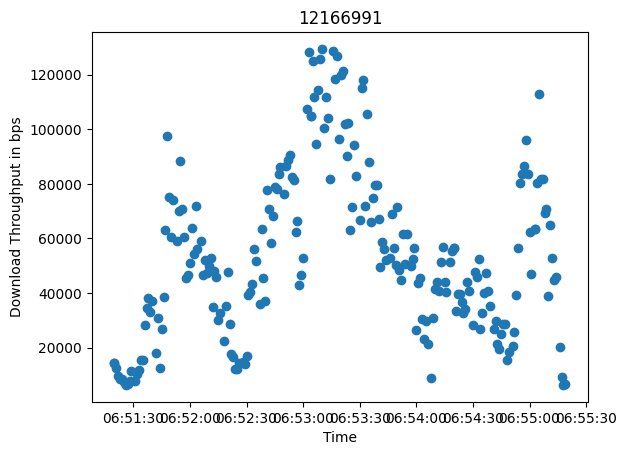

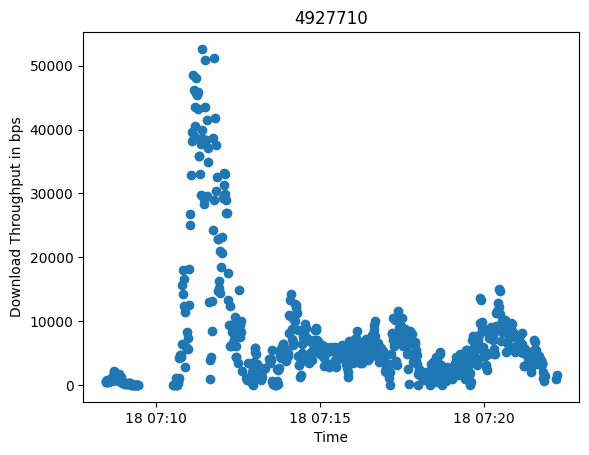

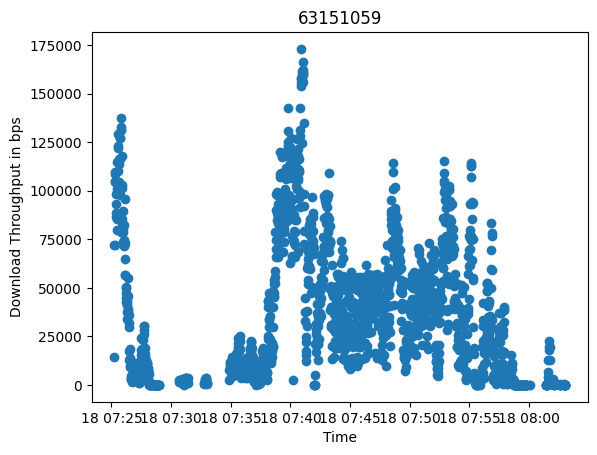

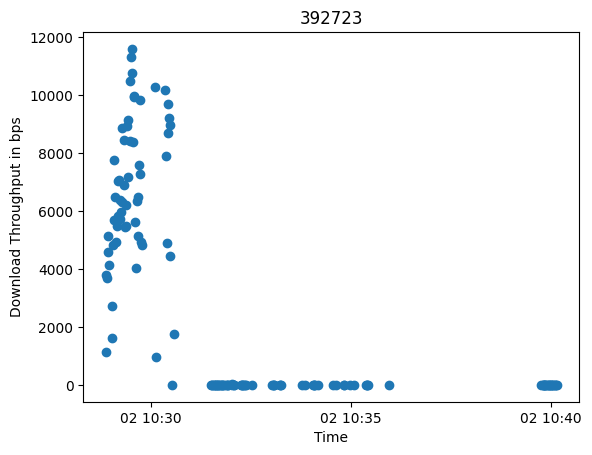

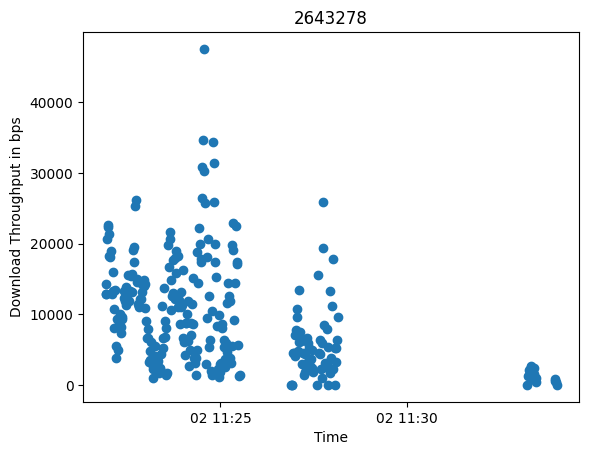

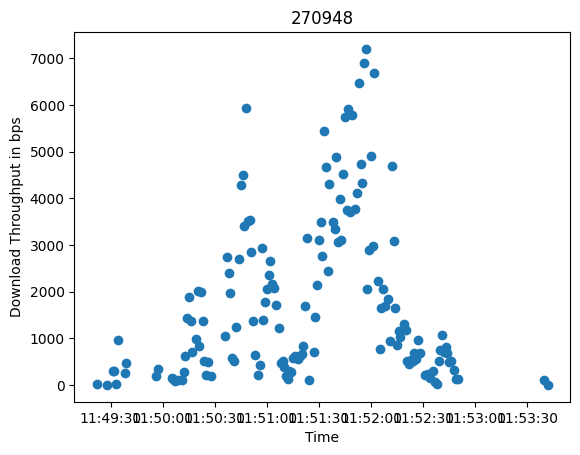

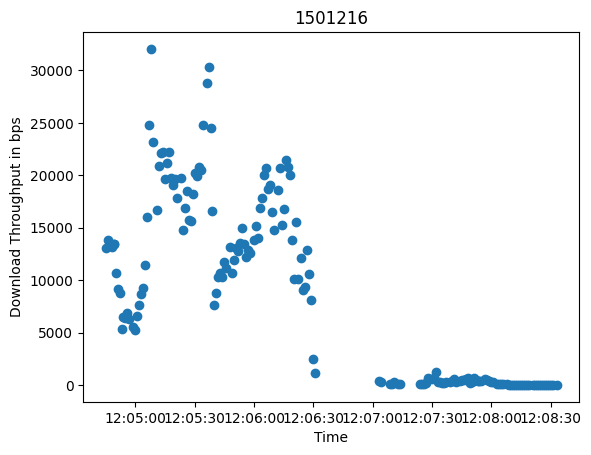

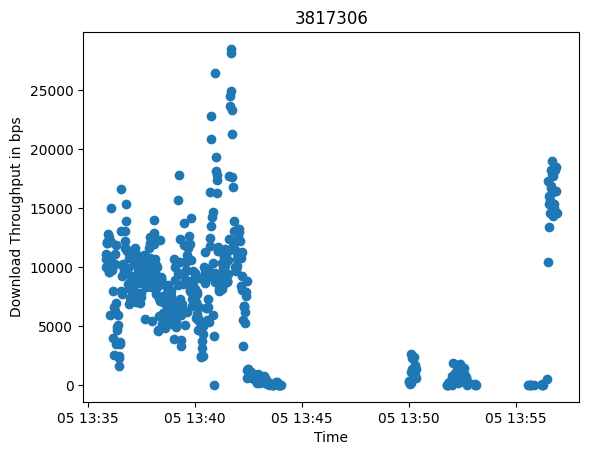

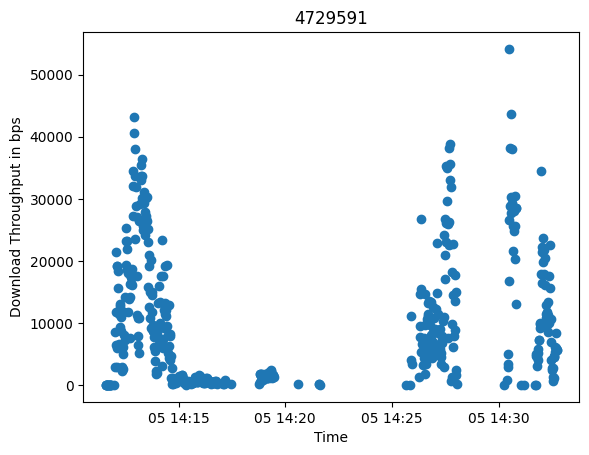

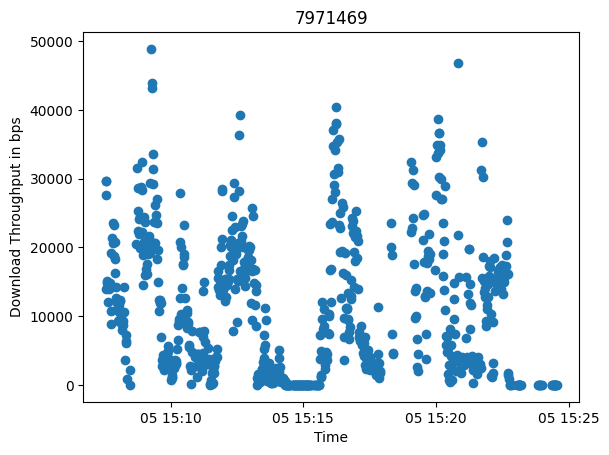

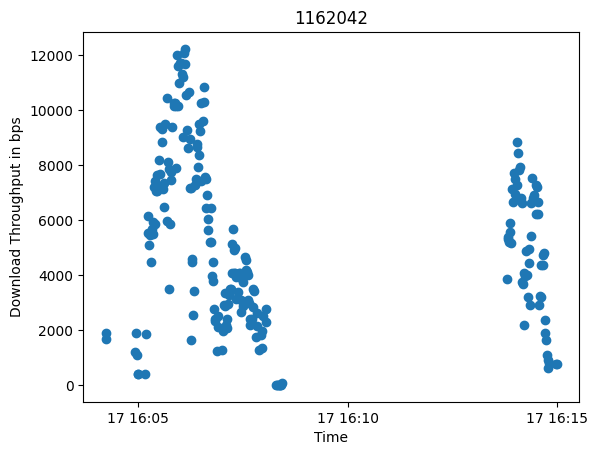

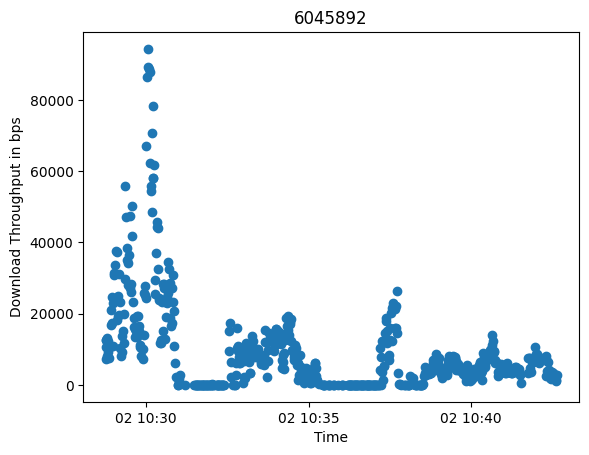

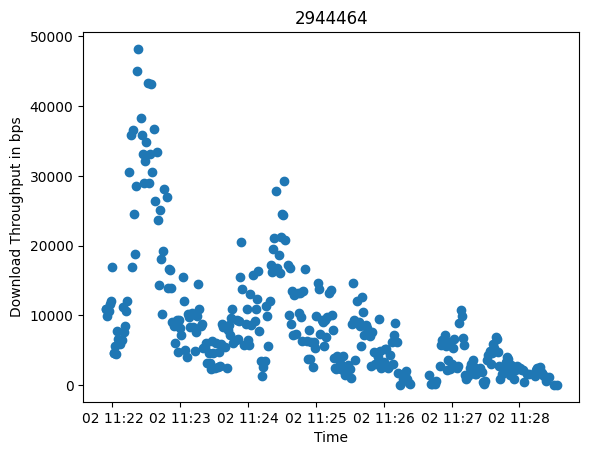

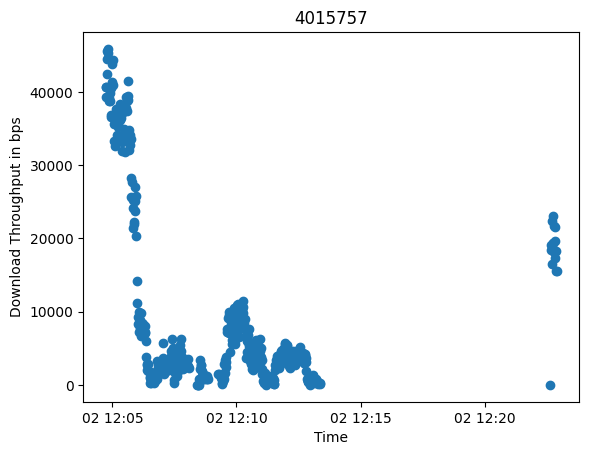

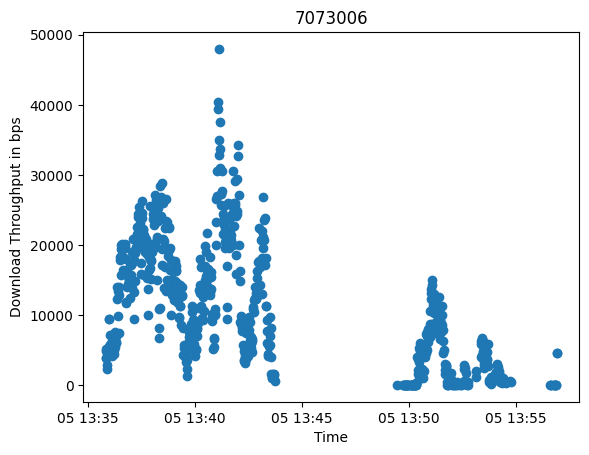

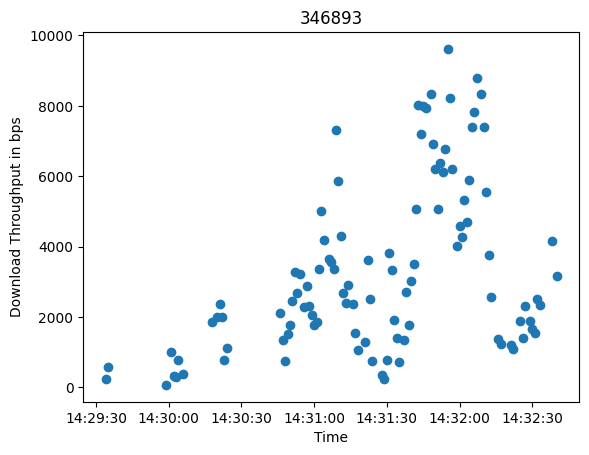

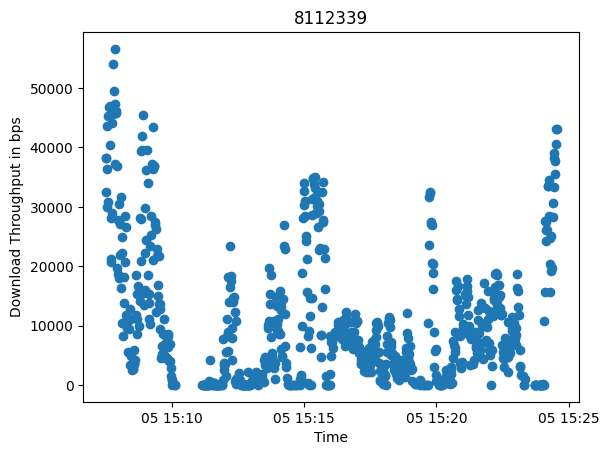

In [25]:
for i in range(132):
    tower = tower_grouped_data[(tower_grouped_data["cell_tower"]==i)]
    for session in pd.unique(tower["session"].sort_values()):
        x_points = tower[(tower["session"]==session)]["Timestamp"]
        y_points = tower[(tower["session"]==session)]["DL_bitrate"]
        fig, ax = plt.subplots()
        ax.scatter(x_points, y_points)
        ax.set_xlabel("Time")
        ax.set_ylabel("Download Throughput in bps")
        ax.set_title(y_points.sum())
        plt.show()
    break

## Feature Correlation Analysis

In [17]:
import configparser
import sys
import tensorflow as tf
import pandas as pd
from keras.callbacks import ModelCheckpoint, TensorBoard

config = configparser.ConfigParser()
config.read('C:\\Users\\Killian\Desktop\\FYP-Multistage-Throughput-Predictor\\.env')
print(config.sections())

module_path = config['global']['MODULE_PATH']
project_path = config['global']['PROJECT_PATH']
sys.path.append(module_path)

from models.simple_LSTM import SimpleLSTM

['global']


In [18]:
DATASETS_FOLDER_PATH = "C:/Users/Killian/Desktop/FYP-Multistage-Throughput-Predictor/Datasets/Raw/"
raw_data_path = DATASETS_FOLDER_PATH + "all_4G_data.csv"

raw_data = pd.read_csv(raw_data_path, index_col=None)

C:\Users\Killian\AppData\Local\Temp\ipykernel_20688\1448511203.py:4: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(raw_data_path, index_col=None)


In [19]:
model = SimpleLSTM(raw_data, "feature_importance_model")
model.pre_process(include_features=["RSRQ", "RSRP", "CQI", "SNR", "UL_bitrate", "NRxRSRP", "NRxRSRQ"])

FileNotFoundError: [Errno 2] No such file or directory: 'src/saved.objects/feature_importance_model.sav'

In [ ]:
model.build_model()

In [ ]:
model.train()